# Visualisations
**Contents**:
 * The [fix](#popFix) for the initial population anomaly. 
 * [TB cases](#TBCasesBaseline) at the 2011 baseline. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# From DefnEncoding.py
# Ethnicity/country -> IBM index
country2Index_dict = {
    'White': 0,
    'Bangladesh': 1,
    'Sub_Saharan_Africa': 2,
    'China': 3,
    'India': 4,
    'Pakistan': 5
    }

# reverse to look up indices. 
index2Country_dict = {v: k for k, v in country2Index_dict.items()}

# fig width in inches
figWidth = 23

The data from the demogData.txt file. This is generated by the function `.demogOut_5()` in the IBM code. It contains population number by age, ethnicity and x-section date in long form.  

In [2]:
# Read in data and convert to wide format.

# X-sectional data at a sequence of times with NO imediate settlement influx. 
fileName = 'DemogXsections_NoImmSettl.txt'
raw_data = pd.read_csv(fileName, sep="\t", comment='#')
raw_data['Year'] = raw_data['Time'].astype(int)
raw_data.drop(['Time'], axis=1, inplace=True)

# Changing into wide format. 
# construct an index that pivot can use. 
indexColumns = ['Ethnicity', 'Age']
newIndex = [(x.values[0], x.values[1]) for i, x in raw_data[indexColumns].iterrows()]

raw_data.index = newIndex

# make the data wide in Year. 
wide_df = raw_data.pivot(columns='Year', values='Number')
year_cols = wide_df.columns.values

# get the index data back into a form to add as columns. 
xx = list(wide_df.index.values)
df = pd.DataFrame(xx)
df.columns = indexColumns

# Index mismatch causes nans in the data. Need to drop them. 
wide_df = pd.concat([df.reset_index(drop=True), wide_df.reset_index(drop=True)], axis=1)

The figure shows the evolution of the age structure across 10 years for each ethnicity.  

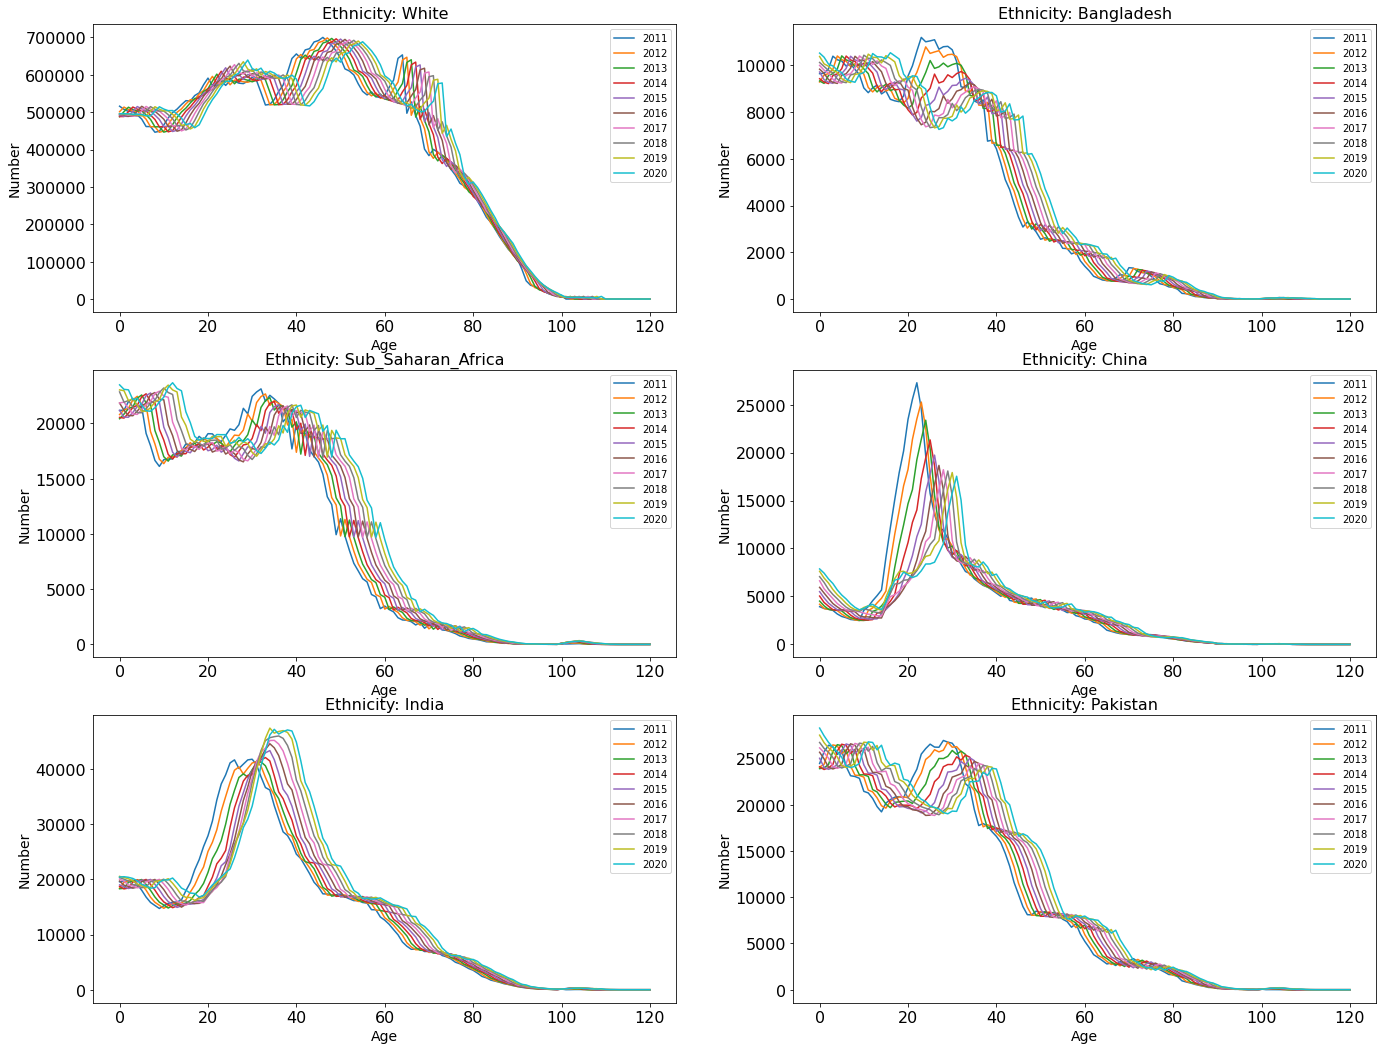

In [3]:
# Group by ethnicity and draw... 

groupedByEth = wide_df.groupby('Ethnicity')

nC = 2
nR = 3
i = 0   # index of the current plot in the loop.
fig, ax = plt.subplots(ncols=nC, nrows=nR)

# loop through the elements of the grouping. 
for eth, plot_df in groupedByEth:
    i_row = i // 2
    i_col = i % 2
    currentAx = ax[i_row, i_col]
    plot_df.plot.line(x='Age', y=year_cols, ax=currentAx)
    plotTitle = f'Ethnicity: {index2Country_dict[eth]}'
    currentAx.set_title(plotTitle, fontsize=16)
    currentAx.set_ylabel('Number', fontsize=14)
    currentAx.set_xlabel(xlabel='Age', fontsize=14)
    currentAx.tick_params(axis='both', which='major', labelsize=16)
    i = i+1

fig.set_size_inches(figWidth, 18)
plt.show()

## Impact of immediate settlement influx on x-section
The figures below compare the age profile of x-sections with and without the influx of immediate settlement visa holders. 

In [4]:
# read in the x-section data with immediate settlement influx. 
fileName = 'DemogXsections_ImmSettl.txt'
raw_data2 = pd.read_csv(fileName, sep="\t", comment='#')
raw_data2['Year'] = raw_data2['Time'].astype(int)
raw_data2.drop(['Time'],axis=1, inplace=True)

# rename columns for plot. 
raw_data2.rename(columns={'Number': 'N_ImmSett'}, inplace=True)
raw_data.rename(columns={'Number': 'N_NoImmSett'}, inplace=True)

# group both data sets by year and ethnicity. 
ImmSettl_groupedByY_Eth = raw_data2.groupby(['Year', 'Ethnicity'])
NoImmSettl_groupedByY_Eth = raw_data.groupby(['Year', 'Ethnicity'])

xSectionYears = [2012, 2014, 2017, 2020]

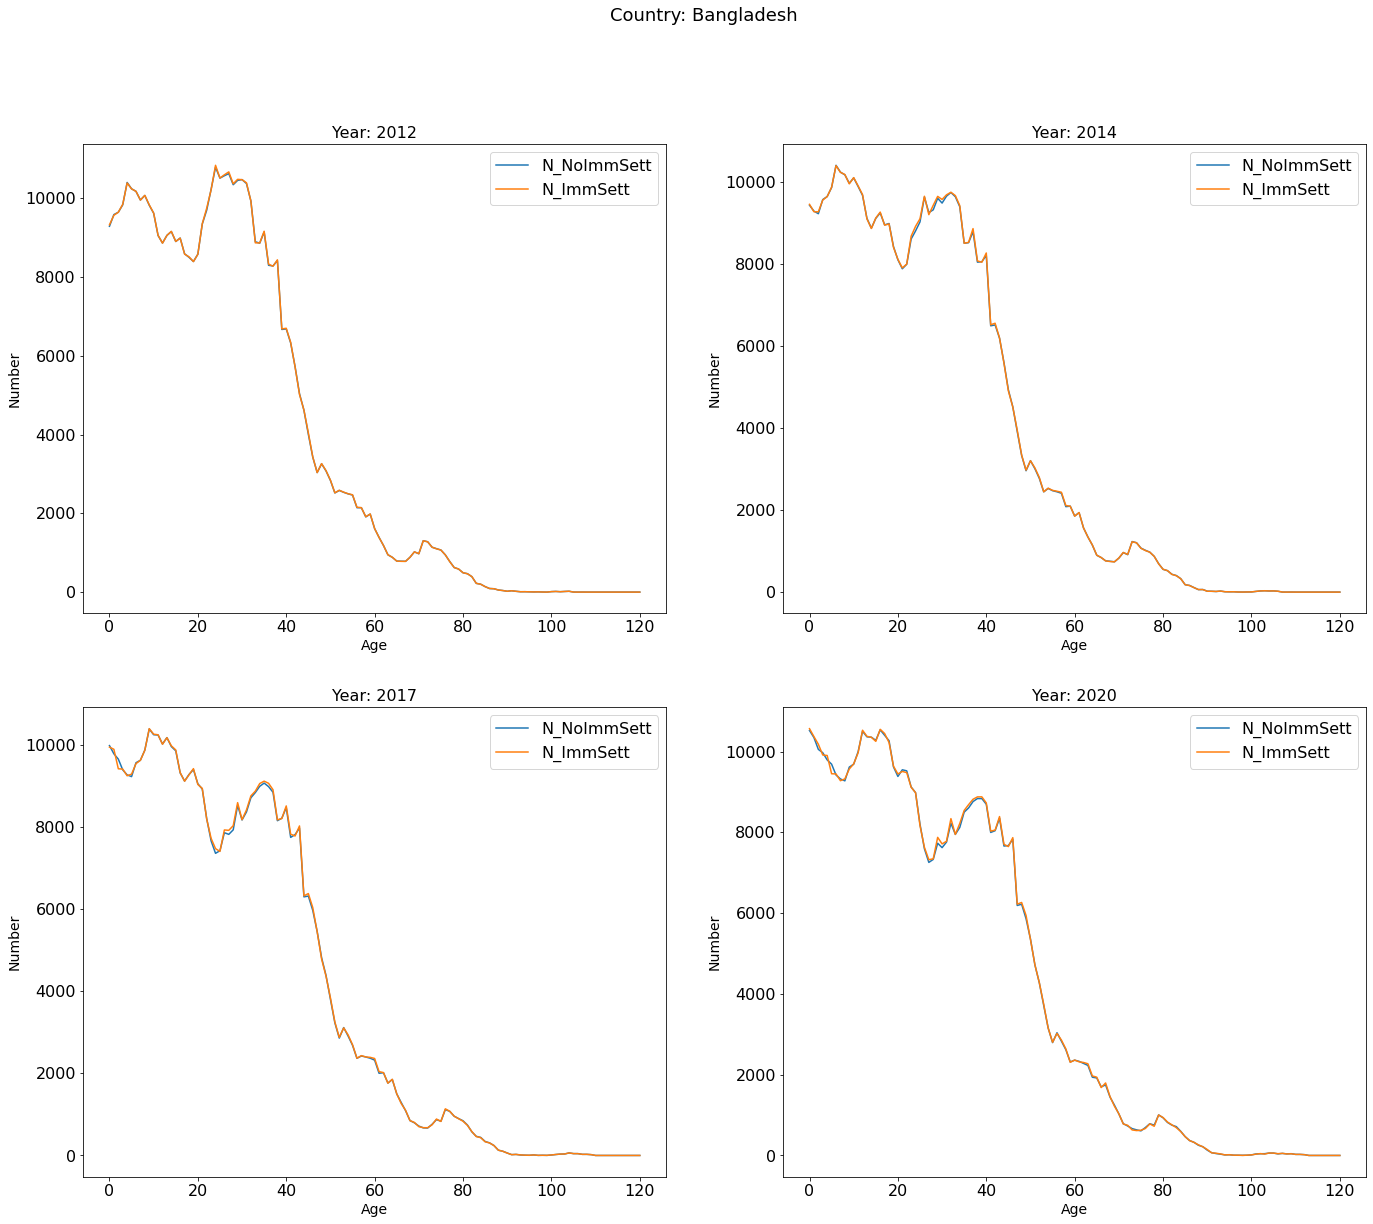

In [5]:
# for a given ethnicity, show the cross-section comparison for a range of time points. 
ethName = 'Bangladesh'
ethnicityIndex = country2Index_dict[ethName] 

fig, ax = plt.subplots(ncols=2, nrows=2)

i = 0
for yr in xSectionYears:
    i_row = i // 2
    i_col = i % 2
    currentAx = ax[i_row, i_col]
    currentGroup = (yr, ethnicityIndex)
    NoImmPlot = NoImmSettl_groupedByY_Eth.get_group(currentGroup).copy()
    ImmPlot = ImmSettl_groupedByY_Eth.get_group(currentGroup).copy()
    ImmPlot.set_index('Age', inplace=True)
    plot_df = NoImmPlot.join(ImmPlot['N_ImmSett'], on='Age', lsuffix='_Imm')
    plot_df.plot.line(x='Age', y=['N_NoImmSett', 'N_ImmSett'], ax=currentAx)
    currentAx.set_title(f'Year: {yr}', fontsize=16)
    currentAx.set_ylabel('Number', fontsize=14)
    currentAx.set_xlabel(xlabel='Age', fontsize=14)
    currentAx.tick_params(axis='both', which='major', labelsize=16)
    currentAx.legend(fontsize=16)
    i += 1 

fig.set_size_inches(figWidth, 19)
fig.suptitle(f'Country: {ethName}', fontsize=18)
#fig.tight_layout()
plt.show()

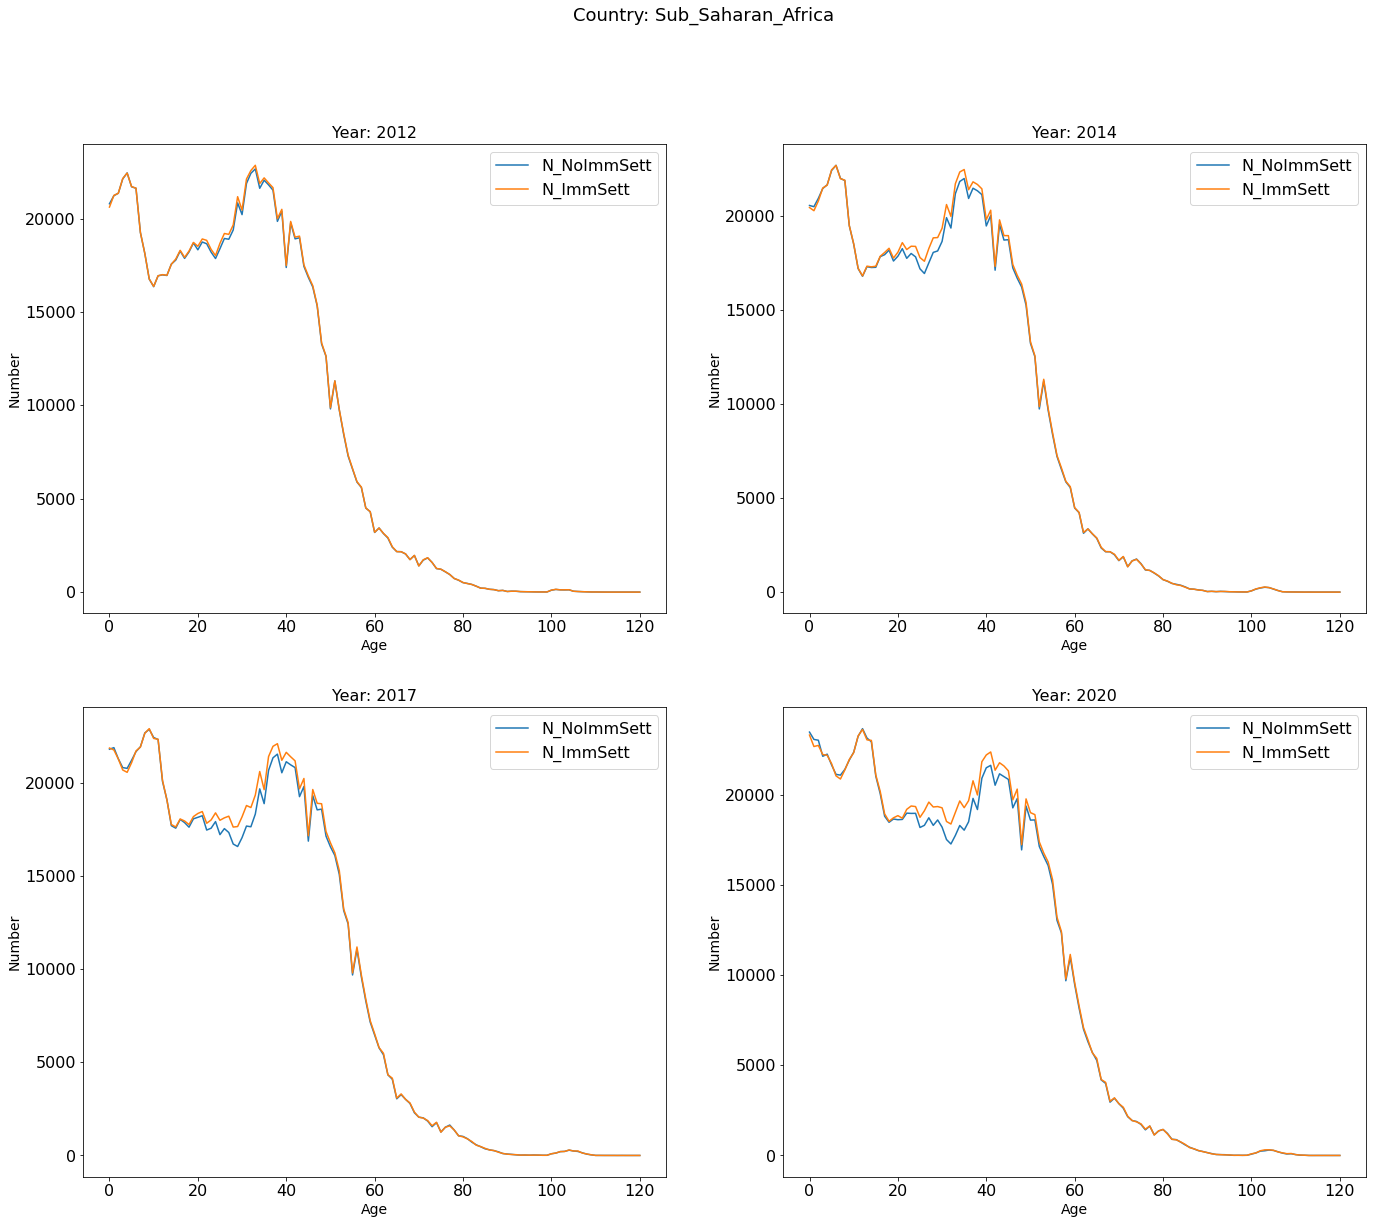

In [6]:
# for a given ethnicity, show the cross-section comparison for a range of time points. 
ethName = 'Sub_Saharan_Africa'
ethnicityIndex = country2Index_dict[ethName] 

fig, ax = plt.subplots(ncols=2, nrows=2)

i = 0
for yr in xSectionYears:
    i_row = i // 2
    i_col = i % 2
    currentAx = ax[i_row, i_col]
    currentGroup = (yr, ethnicityIndex)
    NoImmPlot = NoImmSettl_groupedByY_Eth.get_group(currentGroup).copy()
    ImmPlot = ImmSettl_groupedByY_Eth.get_group(currentGroup).copy()
    ImmPlot.set_index('Age', inplace=True)
    plot_df = NoImmPlot.join(ImmPlot['N_ImmSett'], on='Age', lsuffix='_Imm')
    plot_df.plot.line(x='Age', y=['N_NoImmSett', 'N_ImmSett'], ax=currentAx)
    currentAx.set_title(f'Year: {yr}', fontsize=16)
    currentAx.set_ylabel('Number', fontsize=14)
    currentAx.set_xlabel(xlabel='Age', fontsize=14)
    currentAx.tick_params(axis='both', which='major', labelsize=16)
    currentAx.legend(fontsize=16)
    i += 1 

fig.set_size_inches(figWidth, 19)
fig.suptitle(f'Country: {ethName}', fontsize=18)
#fig.tight_layout()
plt.show()

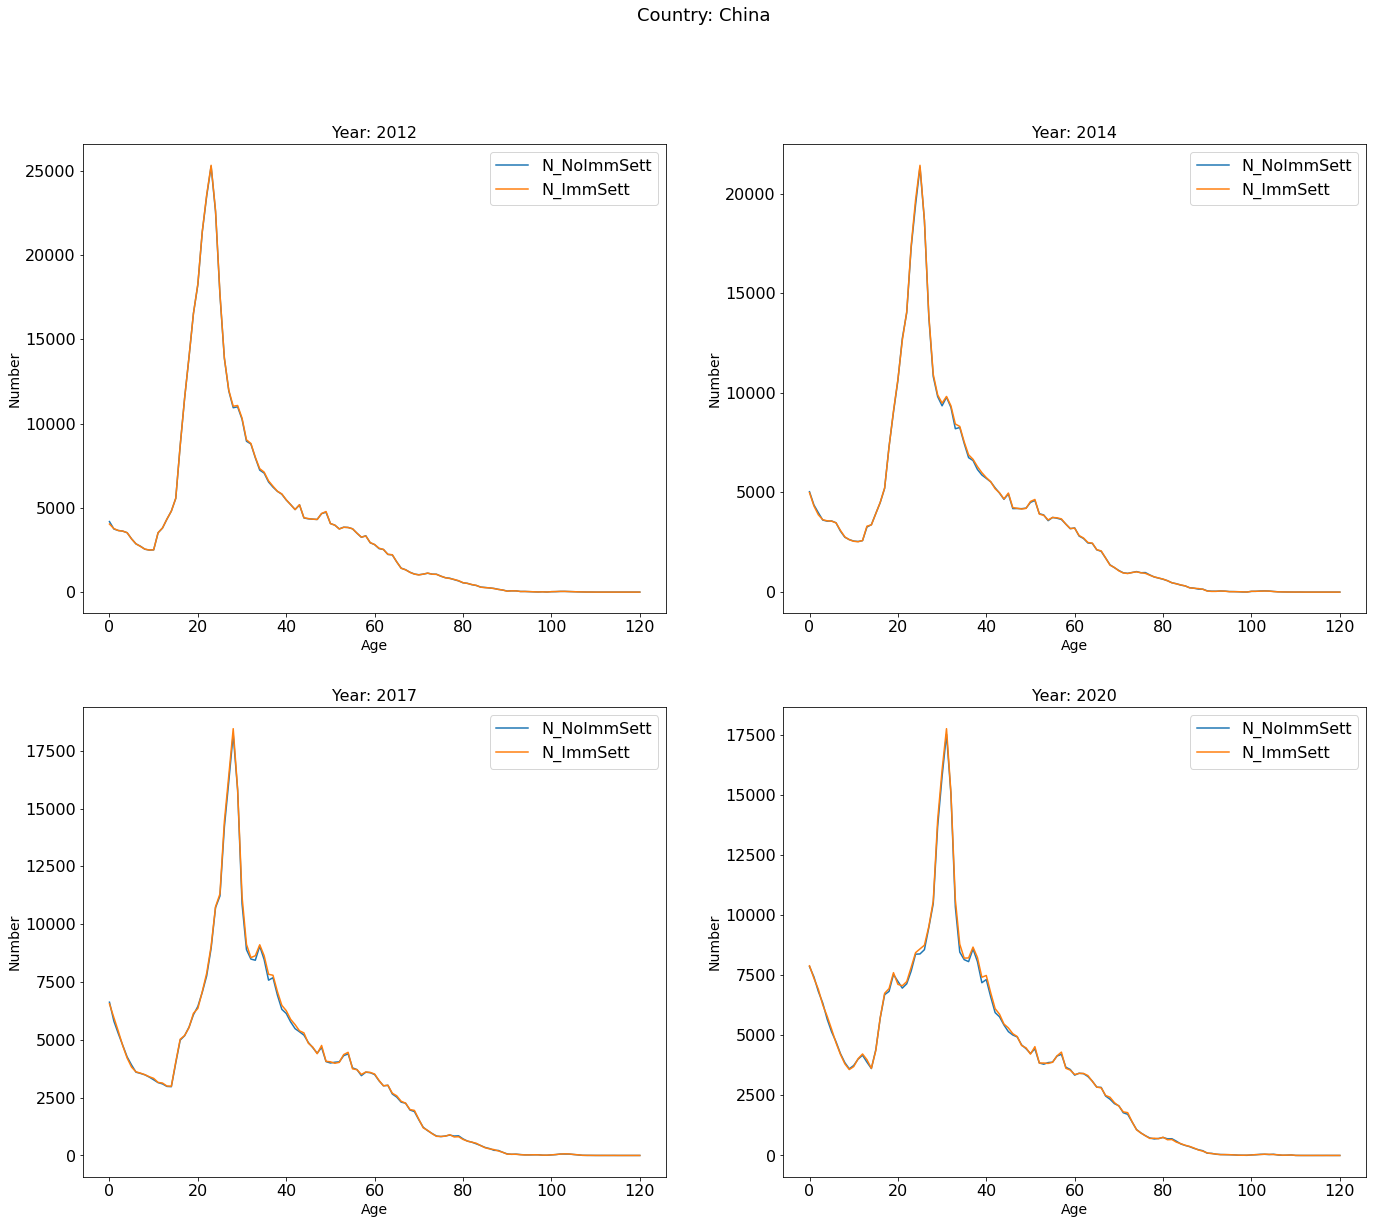

In [7]:
# for a given ethnicity, show the cross-section comparison for a range of time points. 
ethName = 'China'
ethnicityIndex = country2Index_dict[ethName] 

fig, ax = plt.subplots(ncols=2, nrows=2)

i = 0
for yr in xSectionYears:
    i_row = i // 2
    i_col = i % 2
    currentAx = ax[i_row, i_col]
    currentGroup = (yr, ethnicityIndex)
    NoImmPlot = NoImmSettl_groupedByY_Eth.get_group(currentGroup).copy()
    ImmPlot = ImmSettl_groupedByY_Eth.get_group(currentGroup).copy()
    ImmPlot.set_index('Age', inplace=True)
    plot_df = NoImmPlot.join(ImmPlot['N_ImmSett'], on='Age', lsuffix='_Imm')
    plot_df.plot.line(x='Age', y=['N_NoImmSett', 'N_ImmSett'], ax=currentAx)
    currentAx.set_title(f'Year: {yr}', fontsize=16)
    currentAx.set_ylabel('Number', fontsize=14)
    currentAx.set_xlabel(xlabel='Age', fontsize=14)
    currentAx.tick_params(axis='both', which='major', labelsize=16)
    currentAx.legend(fontsize=16)
    i += 1 

fig.set_size_inches(figWidth, 19)
fig.suptitle(f'Country: {ethName}', fontsize=18)
#fig.tight_layout()
plt.show()

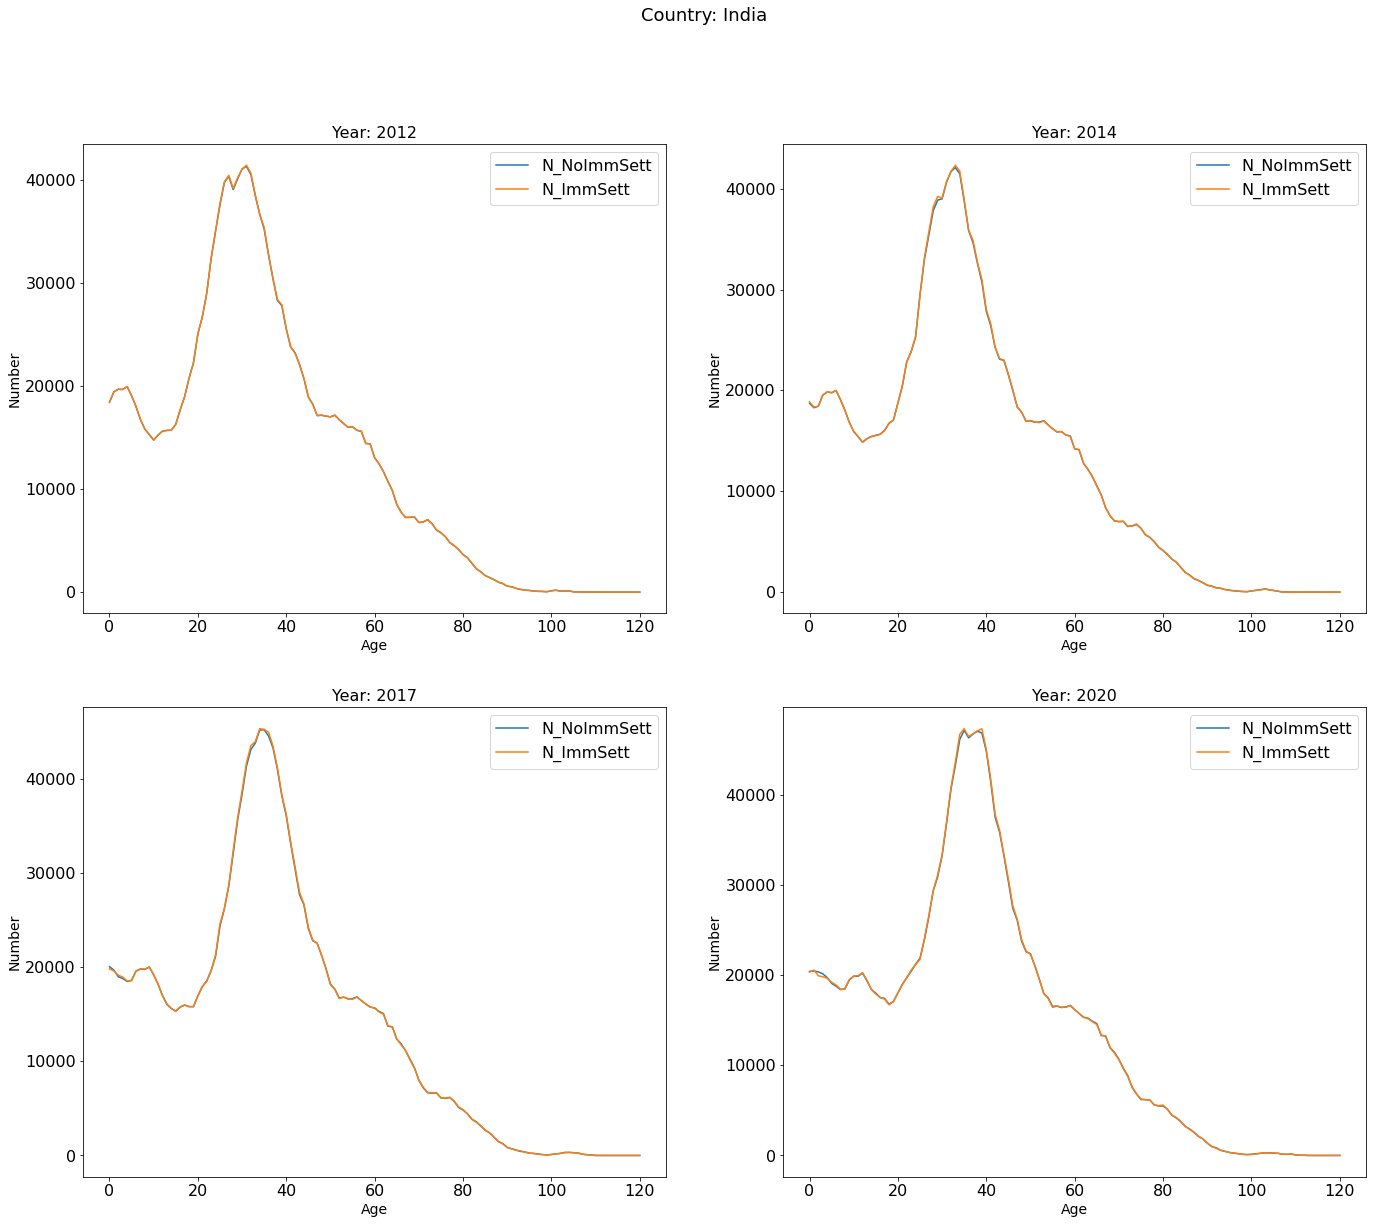

In [8]:
# for a given ethnicity, show the cross-section comparison for a range of time points. 
ethName = 'India'
ethnicityIndex = country2Index_dict[ethName] 

fig, ax = plt.subplots(ncols=2, nrows=2)

i = 0
for yr in xSectionYears:
    i_row = i // 2
    i_col = i % 2
    currentAx = ax[i_row, i_col]
    currentGroup = (yr, ethnicityIndex)
    NoImmPlot = NoImmSettl_groupedByY_Eth.get_group(currentGroup).copy()
    ImmPlot = ImmSettl_groupedByY_Eth.get_group(currentGroup).copy()
    ImmPlot.set_index('Age', inplace=True)
    plot_df = NoImmPlot.join(ImmPlot['N_ImmSett'], on='Age', lsuffix='_Imm')
    plot_df.plot.line(x='Age', y=['N_NoImmSett', 'N_ImmSett'], ax=currentAx)
    currentAx.set_title(f'Year: {yr}', fontsize=16)
    currentAx.set_ylabel('Number', fontsize=14)
    currentAx.set_xlabel(xlabel='Age', fontsize=14)
    currentAx.tick_params(axis='both', which='major', labelsize=16)
    currentAx.legend(fontsize=16)
    i += 1 

fig.set_size_inches(figWidth, 19)
fig.suptitle(f'Country: {ethName}', fontsize=18)
#fig.tight_layout()
plt.show()

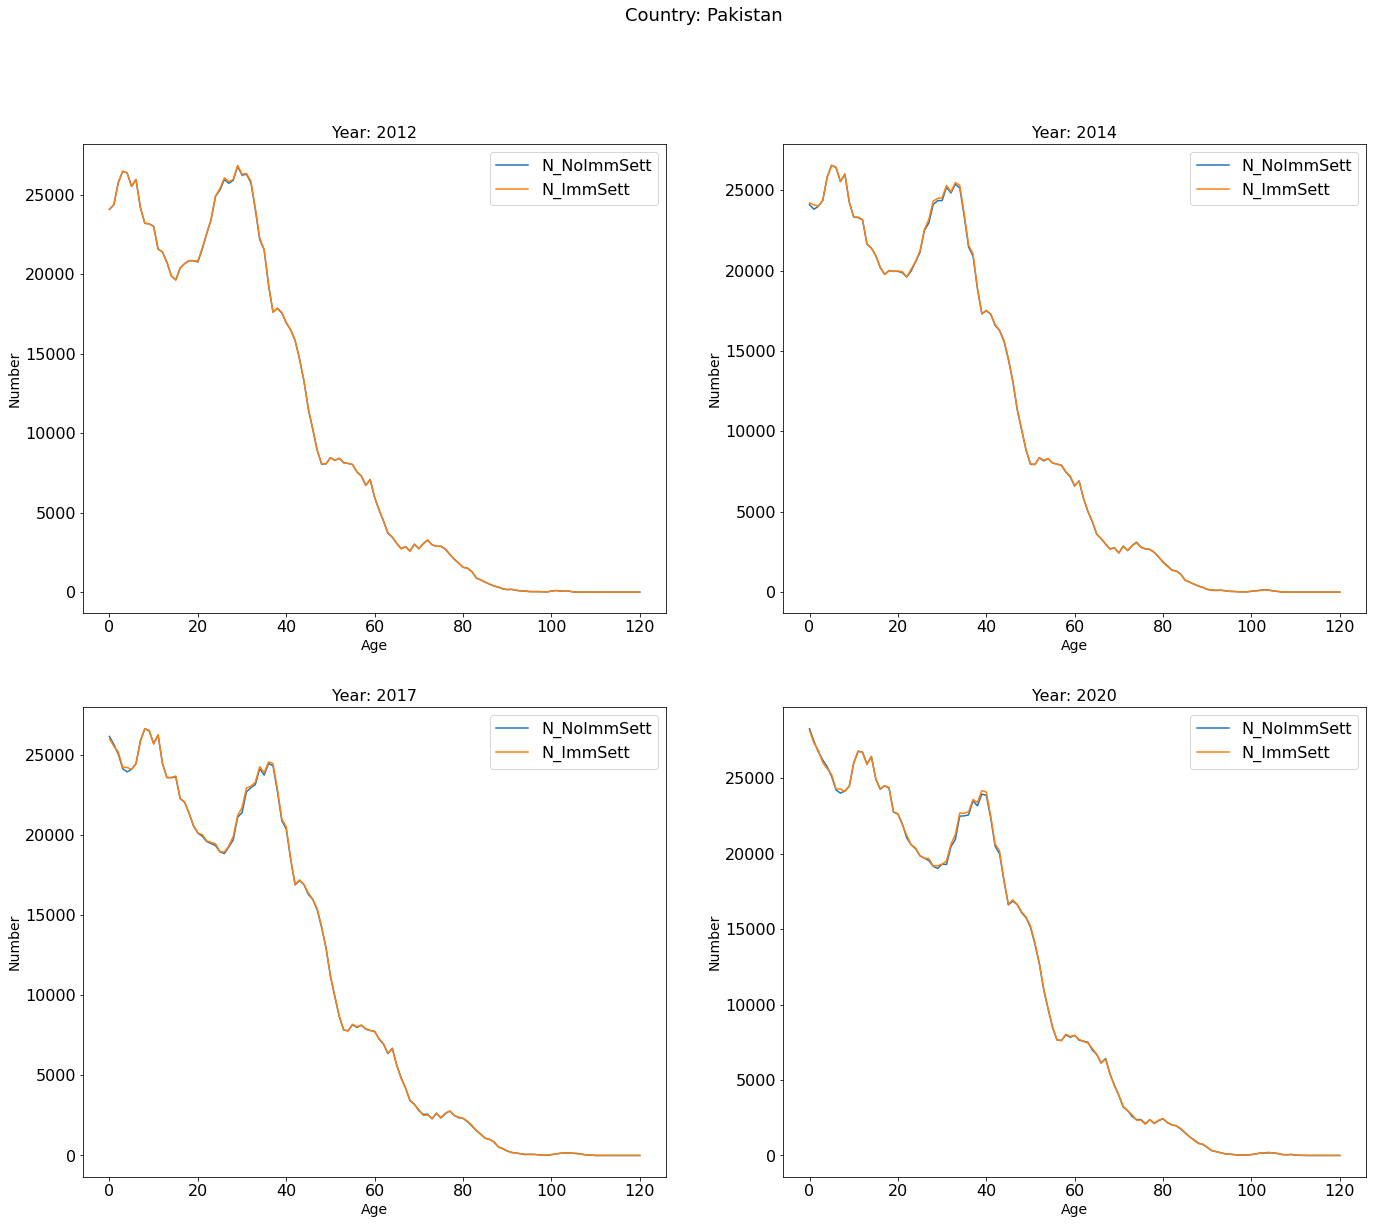

In [9]:
# for a given ethnicity, show the cross-section comparison for a range of time points. 
ethName = 'Pakistan'
ethnicityIndex = country2Index_dict[ethName]

fig, ax = plt.subplots(ncols=2, nrows=2)

i = 0
for yr in xSectionYears:
    i_row = i // 2
    i_col = i % 2
    currentAx = ax[i_row, i_col]
    currentGroup = (yr, ethnicityIndex)
    NoImmPlot = NoImmSettl_groupedByY_Eth.get_group(currentGroup).copy()
    ImmPlot = ImmSettl_groupedByY_Eth.get_group(currentGroup).copy()
    ImmPlot.set_index('Age', inplace=True)
    plot_df = NoImmPlot.join(ImmPlot['N_ImmSett'], on='Age', lsuffix='_Imm')
    plot_df.plot.line(x='Age', y=['N_NoImmSett', 'N_ImmSett'], ax=currentAx)
    currentAx.set_title(f'Year: {yr}', fontsize=16)
    currentAx.set_ylabel('Number', fontsize=14)
    currentAx.set_xlabel(xlabel='Age', fontsize=14)
    currentAx.tick_params(axis='both', which='major', labelsize=16)
    currentAx.legend(fontsize=16)
    i += 1 

fig.set_size_inches(figWidth, 19)
fig.suptitle(f'Country: {ethName}', fontsize=18)
#fig.tight_layout()
plt.show()

## Demographic inflow and outflow

Comparing the inflows and outflows of population as a function of age and stratified by ethnicity and year. On the graphs below, the inflow is positive and outflow is negative. Net is the net inflow at a given age. The utput is generated by the function `demogOut_6()` in the IBM code. 

In [10]:
# Read in the inflow/outflow data...
fileName = 'DemogInflowOutflow.txt'
inOut_data = pd.read_csv(fileName, sep="\t", comment='#')

InOutGrouped = inOut_data.groupby(['Year', 'Ethnicity'])

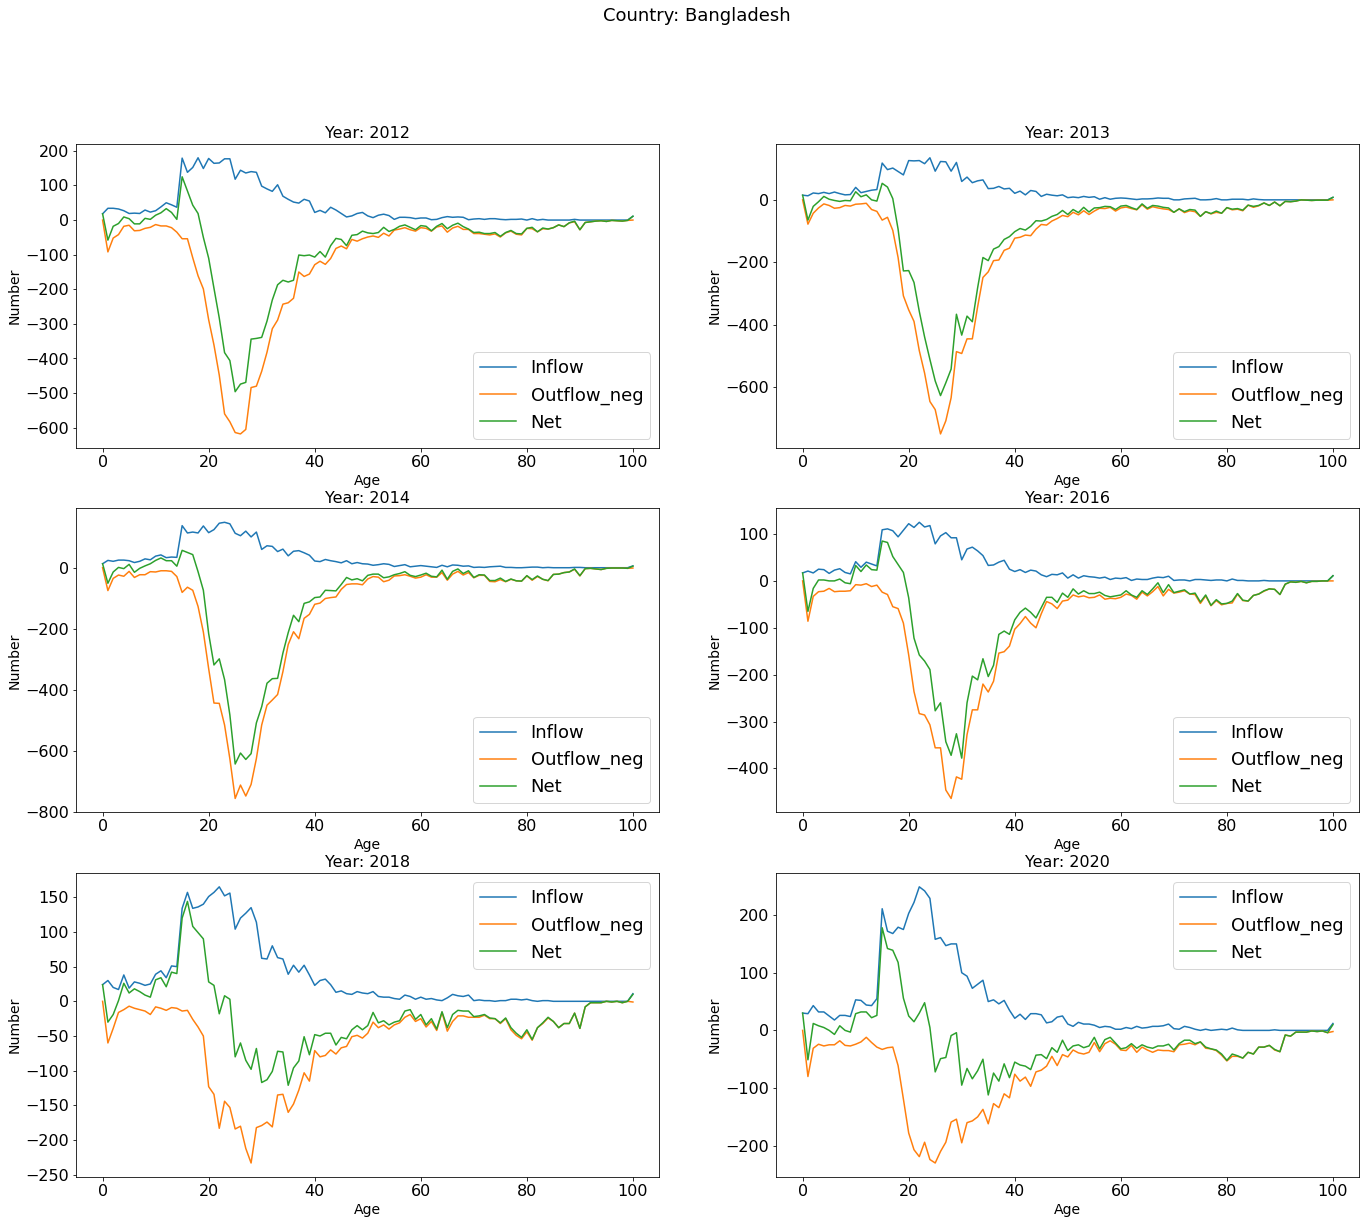

In [11]:
currentEth = 1
years = [1, 2, 3, 5, 7, 9]

fig, ax = plt.subplots(ncols=2, nrows=3) 

for i, yr in enumerate(years):
    i_row = i // 2
    i_col = i % 2
    currentAx = ax[i_row, i_col]
    currentGroup = (yr, currentEth)
    plot_df = InOutGrouped.get_group(currentGroup).copy()
    net = plot_df['Inflow'].values-plot_df['Outflow'].values
    plot_df = plot_df.assign(Outflow_neg=-plot_df['Outflow'].values, Net=net)
    plot_df.plot.line(x='Age', y=['Inflow', 'Outflow_neg', 'Net'], ax=currentAx)
    currentAx.set_title(f'Year: {yr+2011}', fontsize=16)
    currentAx.set_ylabel('Number', fontsize=14)
    currentAx.set_xlabel(xlabel='Age', fontsize=14)
    currentAx.tick_params(axis='both', which='major', labelsize=16)
    currentAx.legend(fontsize=18)


fig.set_size_inches(figWidth, 19)
fig.suptitle(f'Country: {index2Country_dict[currentEth]}', fontsize=18)
# fig.tight_layout()
plt.show()

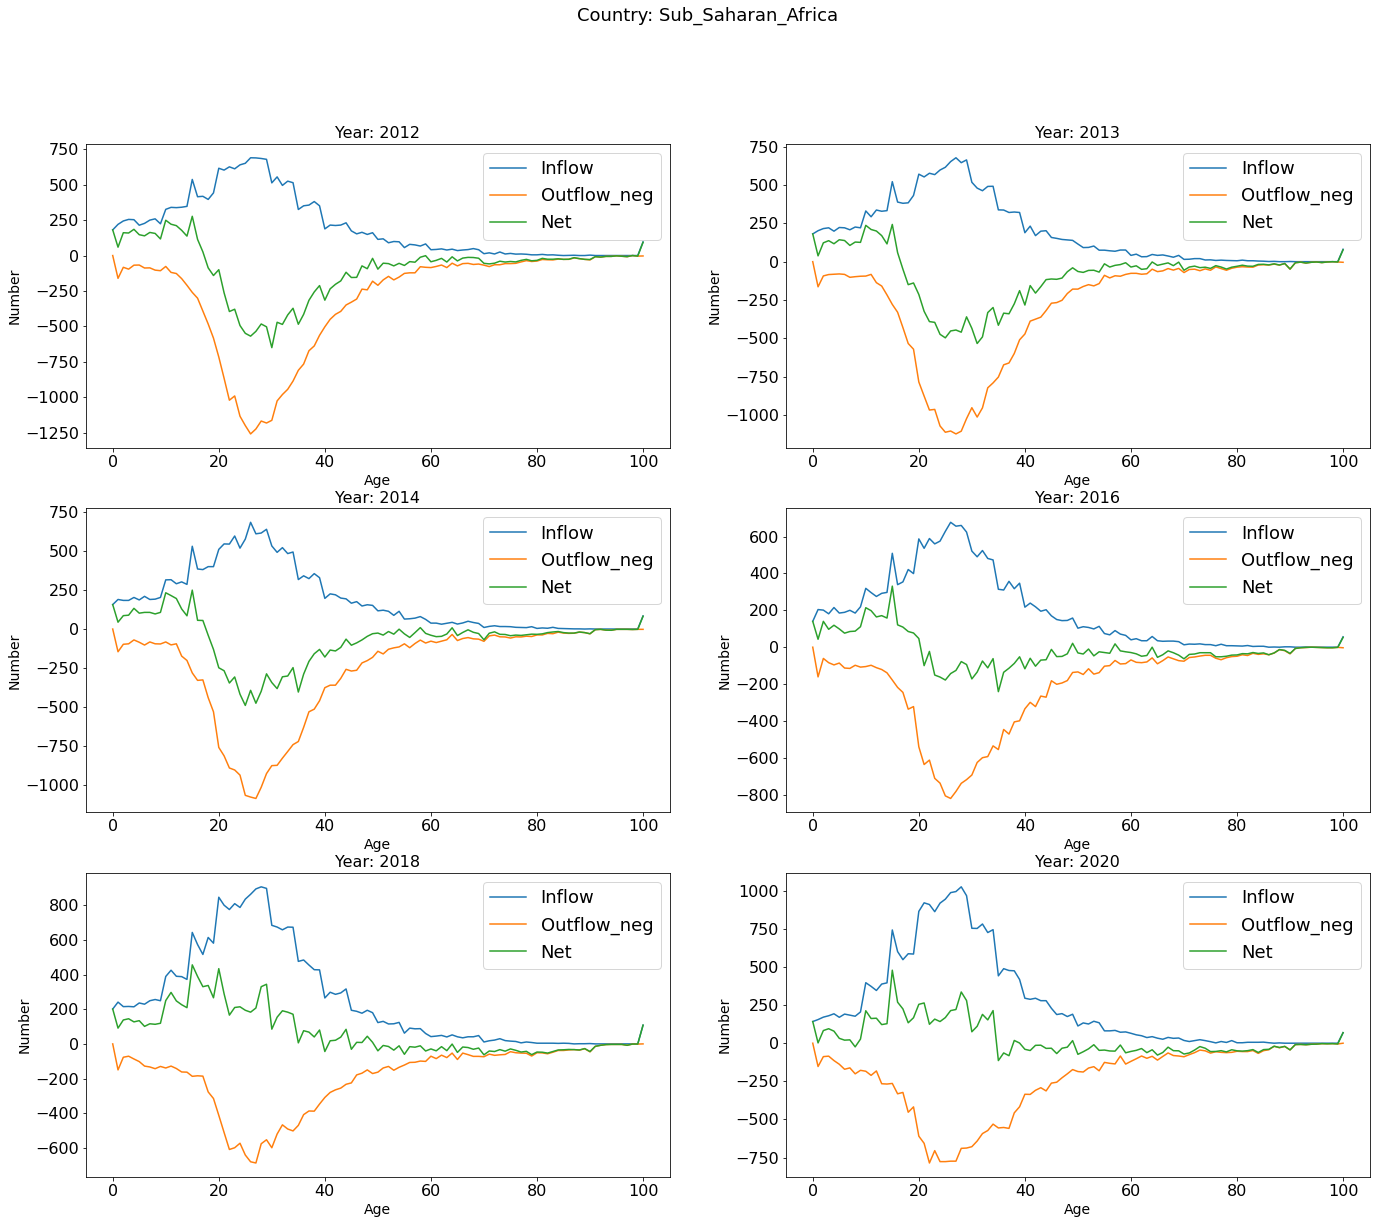

In [12]:
currentEth = 2
years = [1, 2, 3, 5, 7, 9]

fig, ax = plt.subplots(ncols=2, nrows=3) 

for i, yr in enumerate(years):
    i_row = i // 2
    i_col = i % 2
    currentAx = ax[i_row, i_col]
    currentGroup = (yr, currentEth)
    plot_df = InOutGrouped.get_group(currentGroup).copy()
    net = plot_df['Inflow'].values-plot_df['Outflow'].values
    plot_df = plot_df.assign(Outflow_neg=-plot_df['Outflow'].values, Net=net)
    plot_df.plot.line(x='Age', y=['Inflow', 'Outflow_neg', 'Net'], ax=currentAx)
    currentAx.set_title(f'Year: {yr+2011}', fontsize=16)
    currentAx.set_ylabel('Number', fontsize=14)
    currentAx.set_xlabel(xlabel='Age', fontsize=14)
    currentAx.tick_params(axis='both', which='major', labelsize=16)
    currentAx.legend(fontsize=18)


fig.set_size_inches(figWidth, 19)
fig.suptitle(f'Country: {index2Country_dict[currentEth]}', fontsize=18)
# fig.tight_layout()
plt.show()

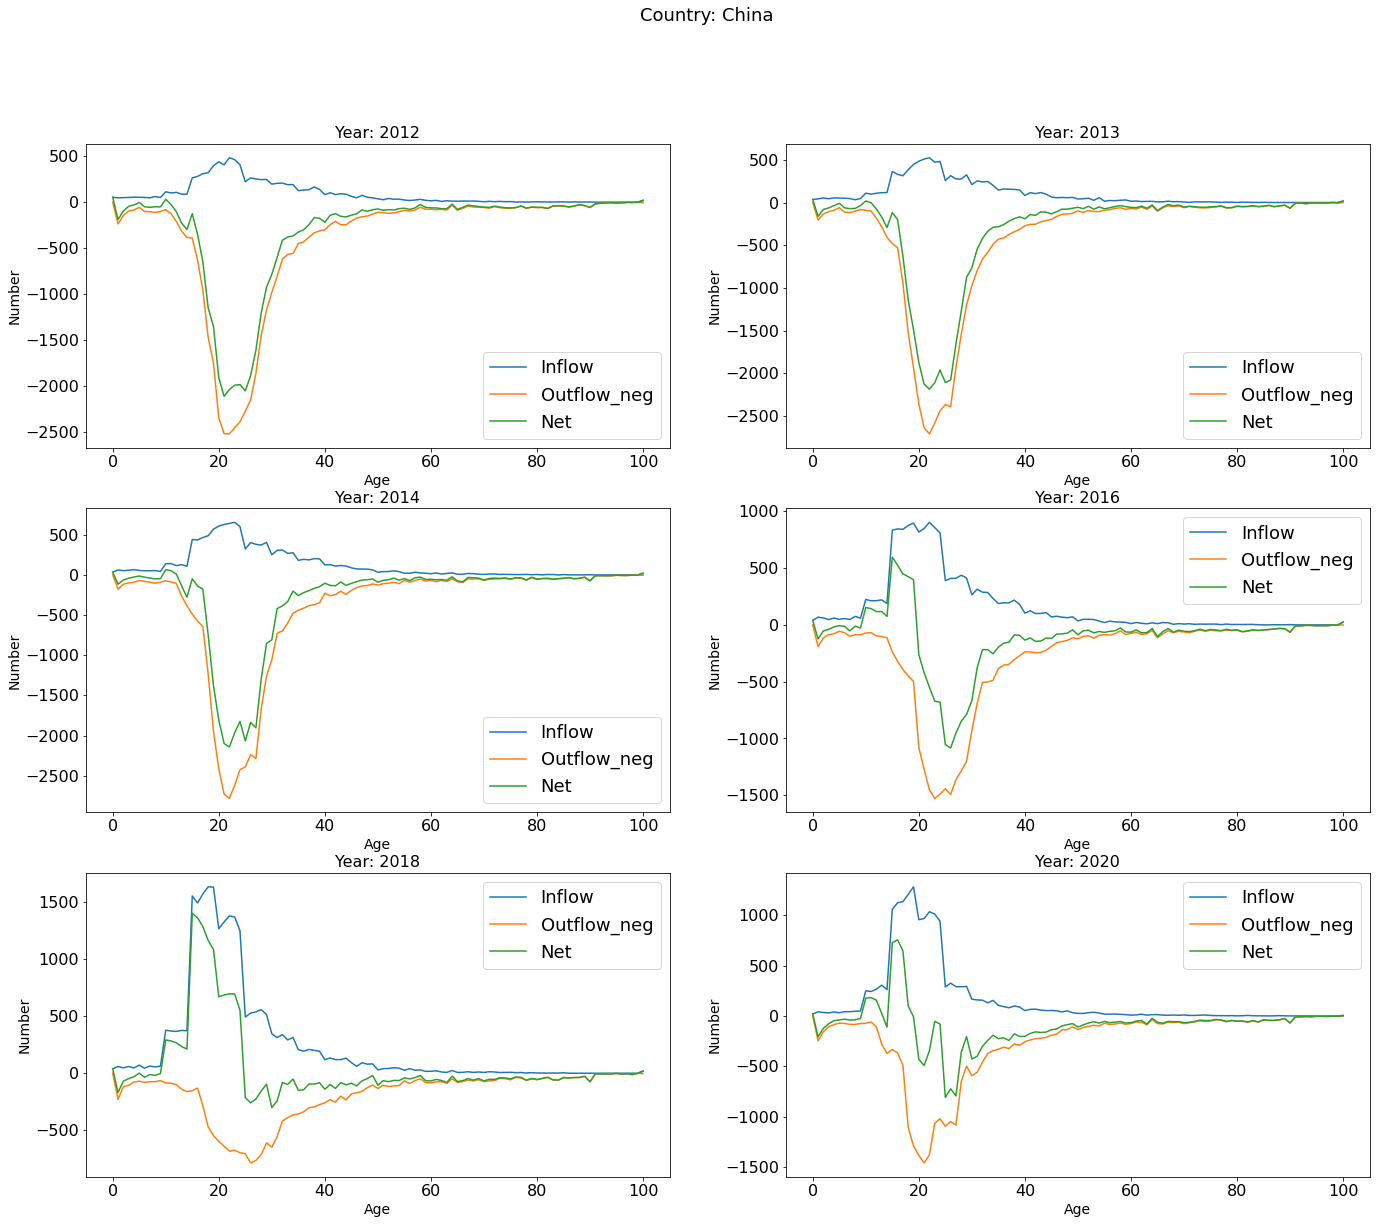

In [13]:
currentEth = 3
years = [1, 2, 3, 5, 7, 9]

fig, ax = plt.subplots(ncols=2, nrows=3) 

for i, yr in enumerate(years):
    i_row = i // 2
    i_col = i % 2
    currentAx = ax[i_row, i_col]
    currentGroup = (yr, currentEth)
    plot_df = InOutGrouped.get_group(currentGroup).copy()
    net = plot_df['Inflow'].values-plot_df['Outflow'].values
    plot_df = plot_df.assign(Outflow_neg=-plot_df['Outflow'].values, Net=net)
    plot_df.plot.line(x='Age', y=['Inflow', 'Outflow_neg', 'Net'], ax=currentAx)
    currentAx.set_title(f'Year: {yr+2011}', fontsize=16)
    currentAx.set_ylabel('Number', fontsize=14)
    currentAx.set_xlabel(xlabel='Age', fontsize=14)
    currentAx.tick_params(axis='both', which='major', labelsize=16)
    currentAx.legend(fontsize=18)


fig.set_size_inches(figWidth, 19)
fig.suptitle(f'Country: {index2Country_dict[currentEth]}', fontsize=18)
# fig.tight_layout()
plt.show()

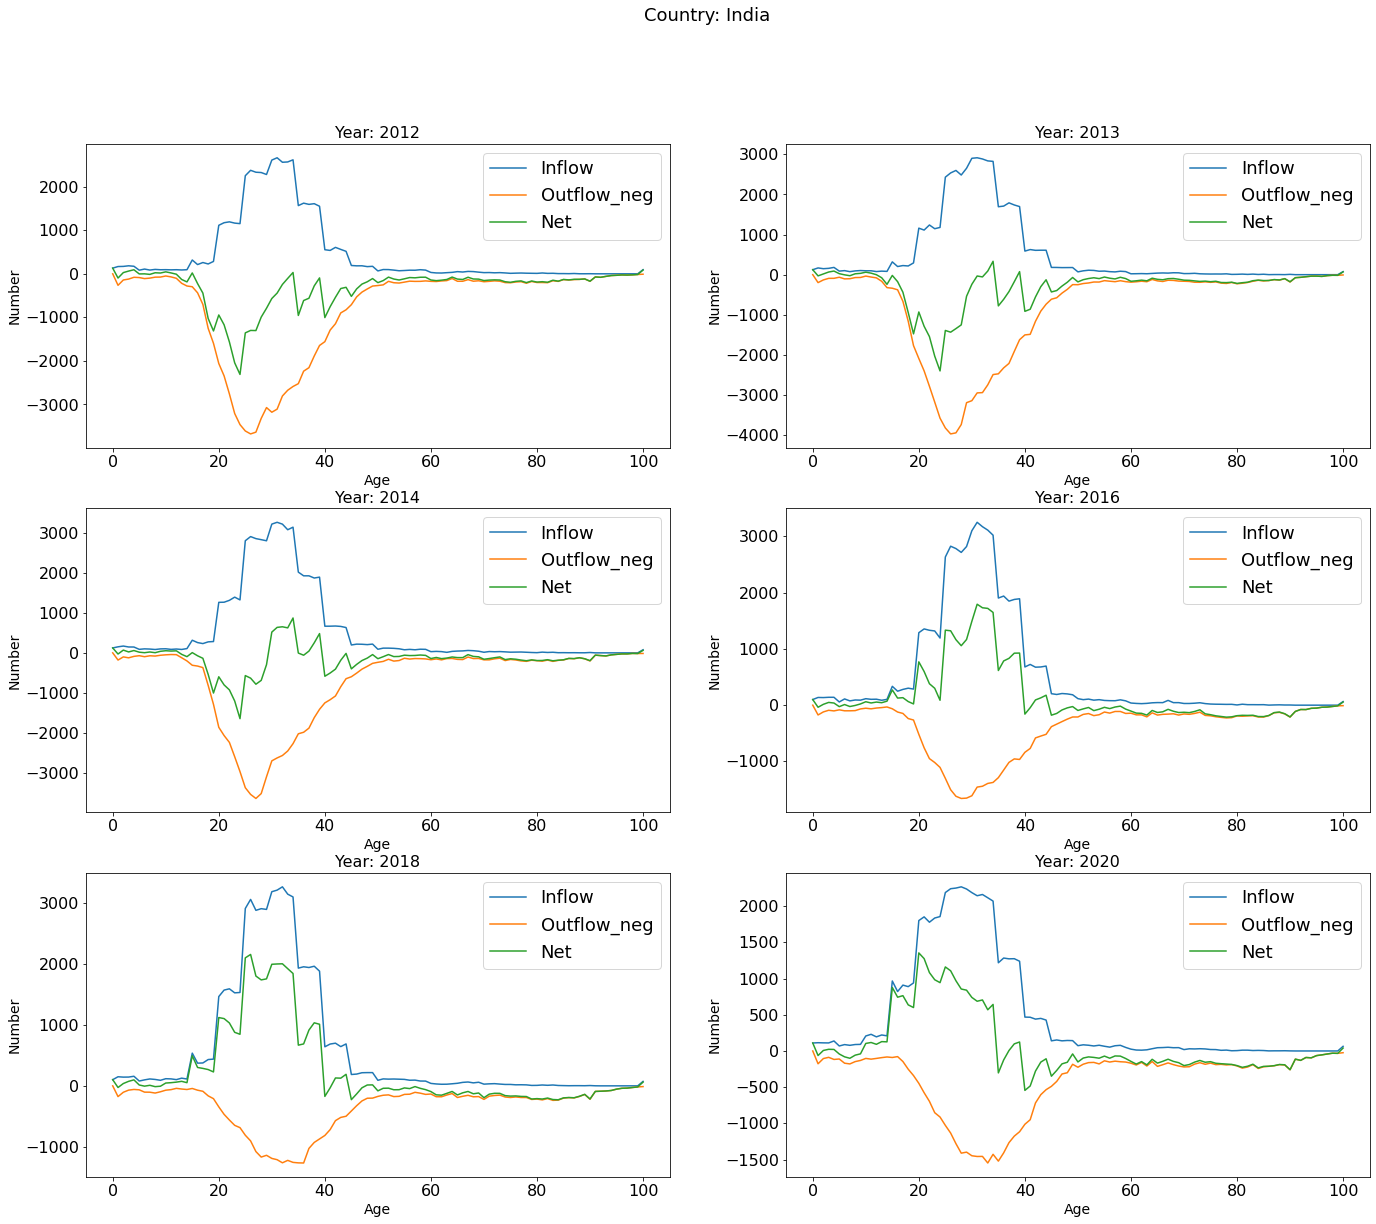

In [14]:
currentEth = 4
years = [1, 2, 3, 5, 7, 9]

fig, ax = plt.subplots(ncols=2, nrows=3) 

for i, yr in enumerate(years):
    i_row = i // 2
    i_col = i % 2
    currentAx = ax[i_row, i_col]
    currentGroup = (yr, currentEth)
    plot_df = InOutGrouped.get_group(currentGroup).copy()
    net = plot_df['Inflow'].values-plot_df['Outflow'].values
    plot_df = plot_df.assign(Outflow_neg=-plot_df['Outflow'].values, Net=net)
    plot_df.plot.line(x='Age', y=['Inflow', 'Outflow_neg', 'Net'], ax=currentAx)
    currentAx.set_title(f'Year: {yr+2011}', fontsize=16)
    currentAx.set_ylabel('Number', fontsize=14)
    currentAx.set_xlabel(xlabel='Age', fontsize=14)
    currentAx.tick_params(axis='both', which='major', labelsize=16)
    currentAx.legend(fontsize=18)


fig.set_size_inches(figWidth, 19)
fig.suptitle(f'Country: {index2Country_dict[currentEth]}', fontsize=18)
# fig.tight_layout()
plt.show()

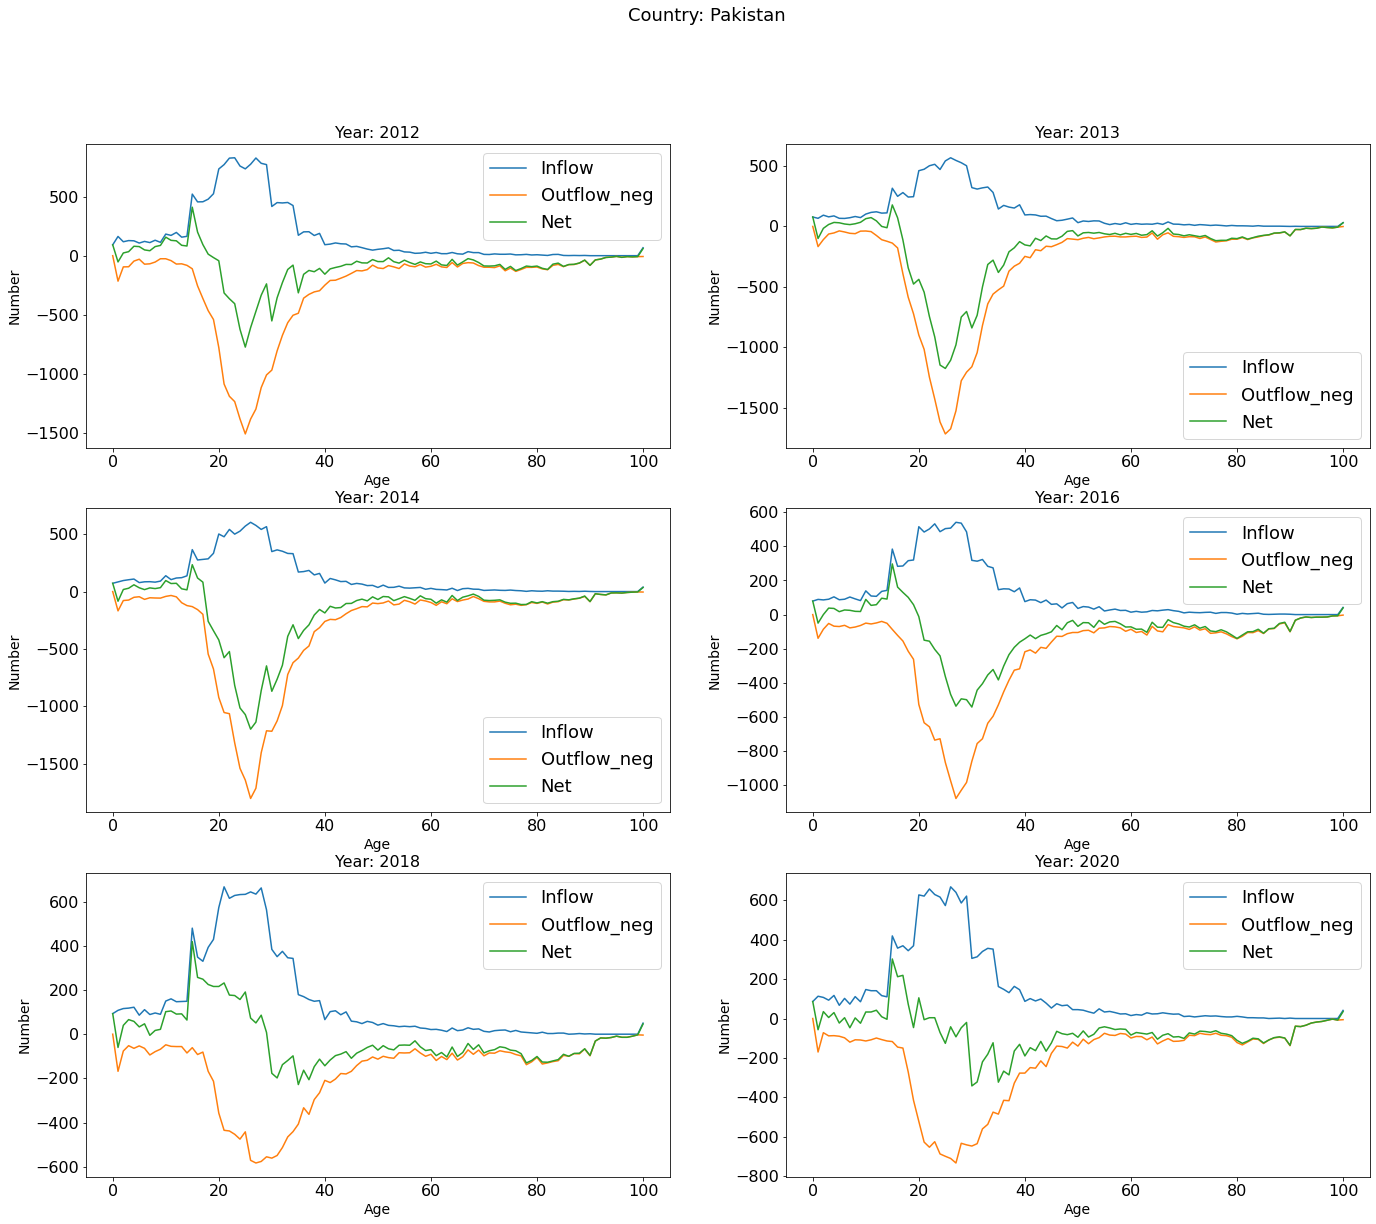

In [15]:
currentEth = 5
years = [1, 2, 3, 5, 7, 9]

fig, ax = plt.subplots(ncols=2, nrows=3) 

for i, yr in enumerate(years):
    i_row = i // 2
    i_col = i % 2
    currentAx = ax[i_row, i_col]
    currentGroup = (yr, currentEth)
    plot_df = InOutGrouped.get_group(currentGroup).copy()
    net = plot_df['Inflow'].values-plot_df['Outflow'].values
    plot_df = plot_df.assign(Outflow_neg=-plot_df['Outflow'].values, Net=net)
    plot_df.plot.line(x='Age', y=['Inflow', 'Outflow_neg', 'Net'], ax=currentAx)
    currentAx.set_title(f'Year: {yr+2011}', fontsize=16)
    currentAx.set_ylabel('Number', fontsize=14)
    currentAx.set_xlabel(xlabel='Age', fontsize=14)
    currentAx.tick_params(axis='both', which='major', labelsize=16)
    currentAx.legend(fontsize=18)


fig.set_size_inches(figWidth, 19)
fig.suptitle(f'Country: {index2Country_dict[currentEth]}', fontsize=18)
# fig.tight_layout()
plt.show()

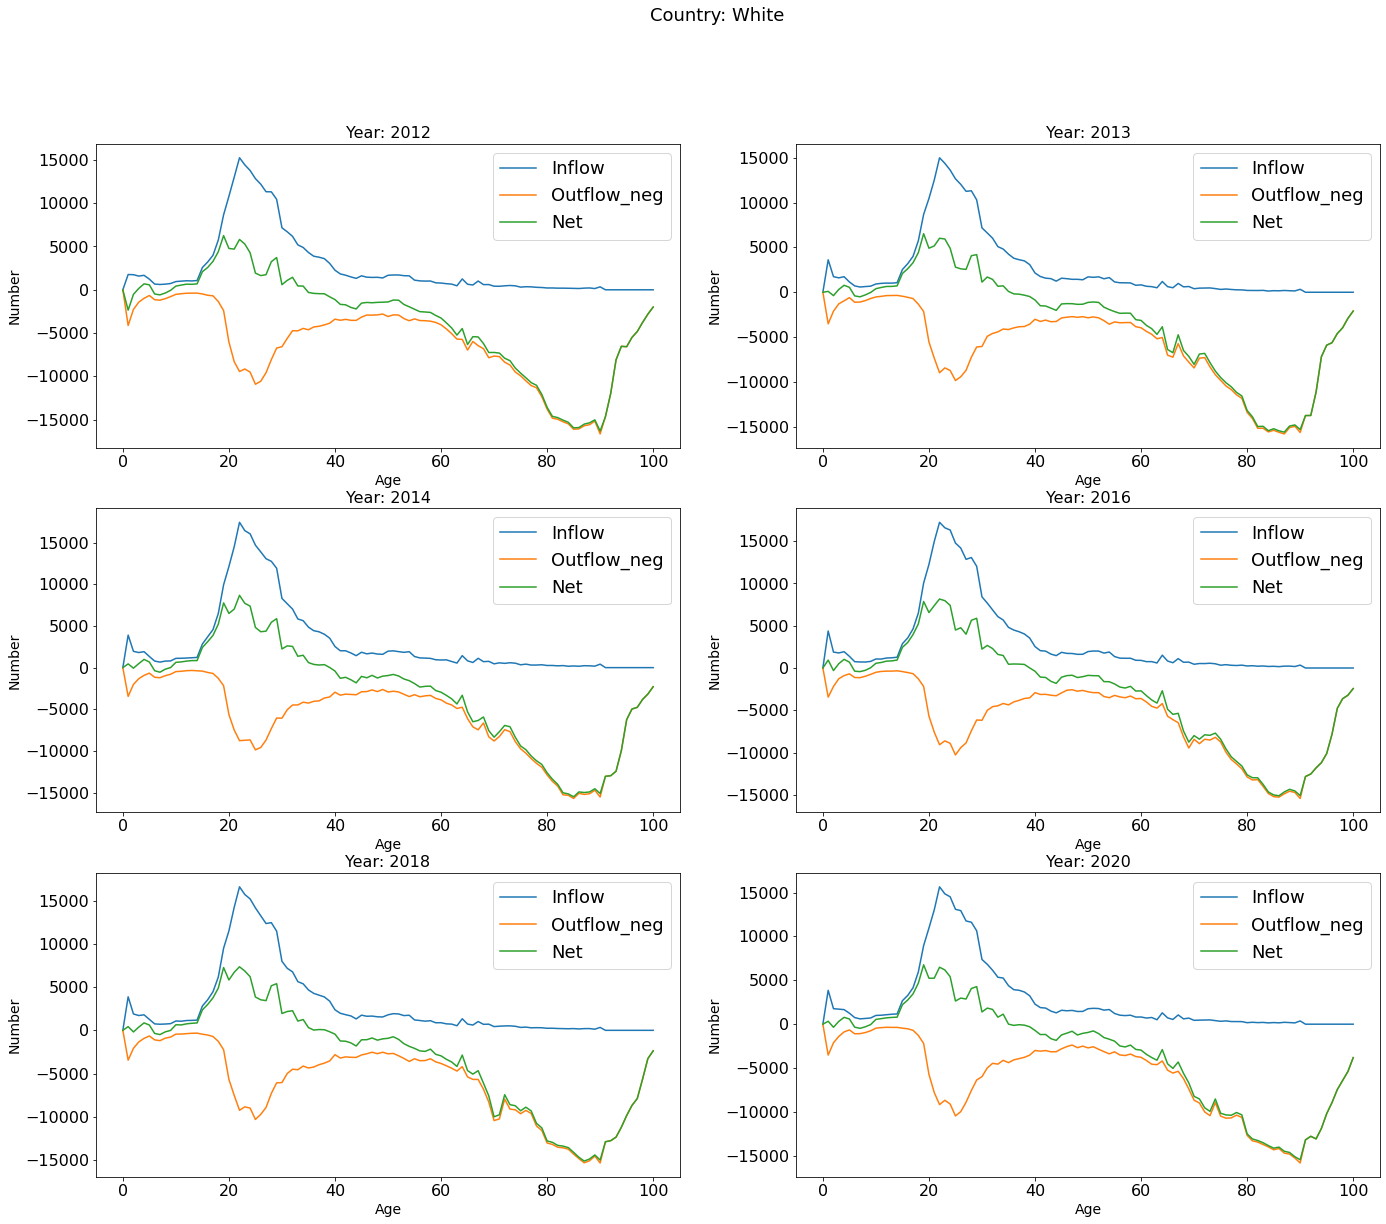

In [16]:
currentEth = 0
years = [1, 2, 3, 5, 7, 9]

fig, ax = plt.subplots(ncols=2, nrows=3)

for i, yr in enumerate(years):
    i_row = i // 2
    i_col = i % 2
    currentAx = ax[i_row, i_col]
    currentGroup = (yr, currentEth)
    plot_df = InOutGrouped.get_group(currentGroup).copy()
    net = plot_df['Inflow'].values-plot_df['Outflow'].values
    plot_df = plot_df.assign(Outflow_neg=-plot_df['Outflow'].values, Net=net)
    plot_df.plot.line(x='Age', y=['Inflow', 'Outflow_neg', 'Net'], ax=currentAx)
    currentAx.set_title(f'Year: {yr+2011}', fontsize=16)
    currentAx.set_ylabel('Number', fontsize=14)
    currentAx.set_xlabel(xlabel='Age', fontsize=14)
    currentAx.tick_params(axis='both', which='major', labelsize=16)
    currentAx.legend(fontsize=18)


fig.set_size_inches(figWidth, 19)
fig.suptitle(f'Country: {index2Country_dict[currentEth]}', fontsize=18)
# fig.tight_layout()
plt.show()

# Initial population distribution - the problem with short-term immigrants <a id='popFix'></a>
The original data for the initial population distribution in 2011 comes from the ONS and that's what we want to match. When we add the short-term immigrants with inflows from the migrant journey dataset, we're going to be above that. We need to partition the census distrbution of individuals in categories between the short-term and  the general aggregated population as effectively as possible. Below, the **General** line represents the census and the green line the short-term immigrant population in 2011 as integrated from the data starting in 2004. 

In [17]:
fileName = 'InitialPopData.txt'
init_data = pd.read_csv(fileName, sep="\t", comment='#')

rename_dict = {'Value': 'General'}
init_data.rename(columns=rename_dict, inplace=True)

print(init_data.columns)
init_data = init_data.assign(Total=init_data['General']+init_data['ShortTerm'])

ageGrouped = init_data.groupby('Age')


# BothSumByAge = ageGrouped[['General', 'Total']].aggregate(sum)
# BothSumByAge.plot.line()

# Get particlar ethnicity...
ageEthGrouped = init_data.groupby(['Ethnicity', 'Age'])
ageEthSum = ageEthGrouped[['General', 'Total']].aggregate(sum)

ethnicities = np.unique(init_data['Ethnicity'])

Index(['ModelYear', 'Year', 'Ethnicity', 'Sex', 'ROB', 'Age', 'General',
       'ShortTerm'],
      dtype='object')


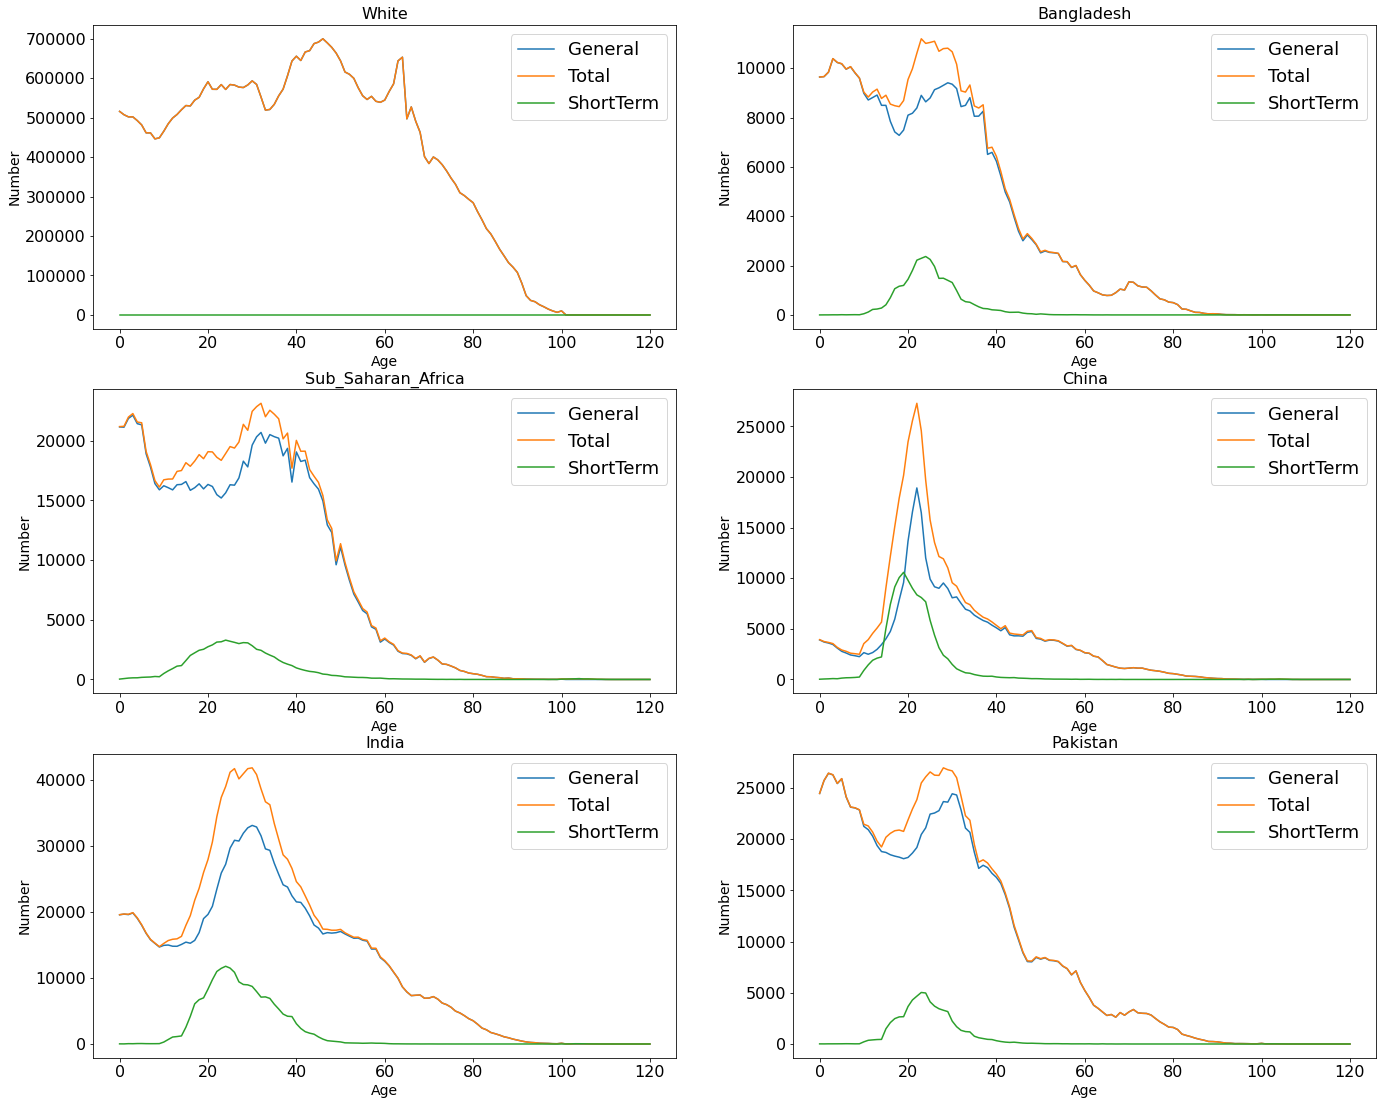

In [18]:
# plot the relationship between ONS and additional short-term influx for each ethnicity. 

fig, ax = plt.subplots(ncols=2, nrows=3)

for i in ethnicities:
    i_row = i // 2
    i_col = i % 2
    currentAx = ax[i_row, i_col]
    ethFilter = ageEthSum.index.get_level_values(0) == i
    plot_df = ageEthSum[ethFilter]
    plot_df = plot_df.assign(ShortTerm=plot_df['Total']-plot_df['General'])
    plot_df = plot_df.assign(Age=plot_df.index.get_level_values(1))
    plot_df.plot.line(x='Age', ax=currentAx)
    currentAx.set_title(index2Country_dict[i], fontsize=16)
    currentAx.set_ylabel('Number', fontsize=14)
    currentAx.set_xlabel(xlabel='Age', fontsize=14)
    currentAx.tick_params(axis='both', which='major', labelsize=16)
    currentAx.legend(fontsize=18)


fig.set_size_inches(figWidth, 19)
# fig.suptitle(f'Country: {index2Country_dict[currentEth]}', fontsize=18)
# fig.tight_layout()
plt.show()

Below is a repeat of the previous figures, but for foreign born individuals only. 

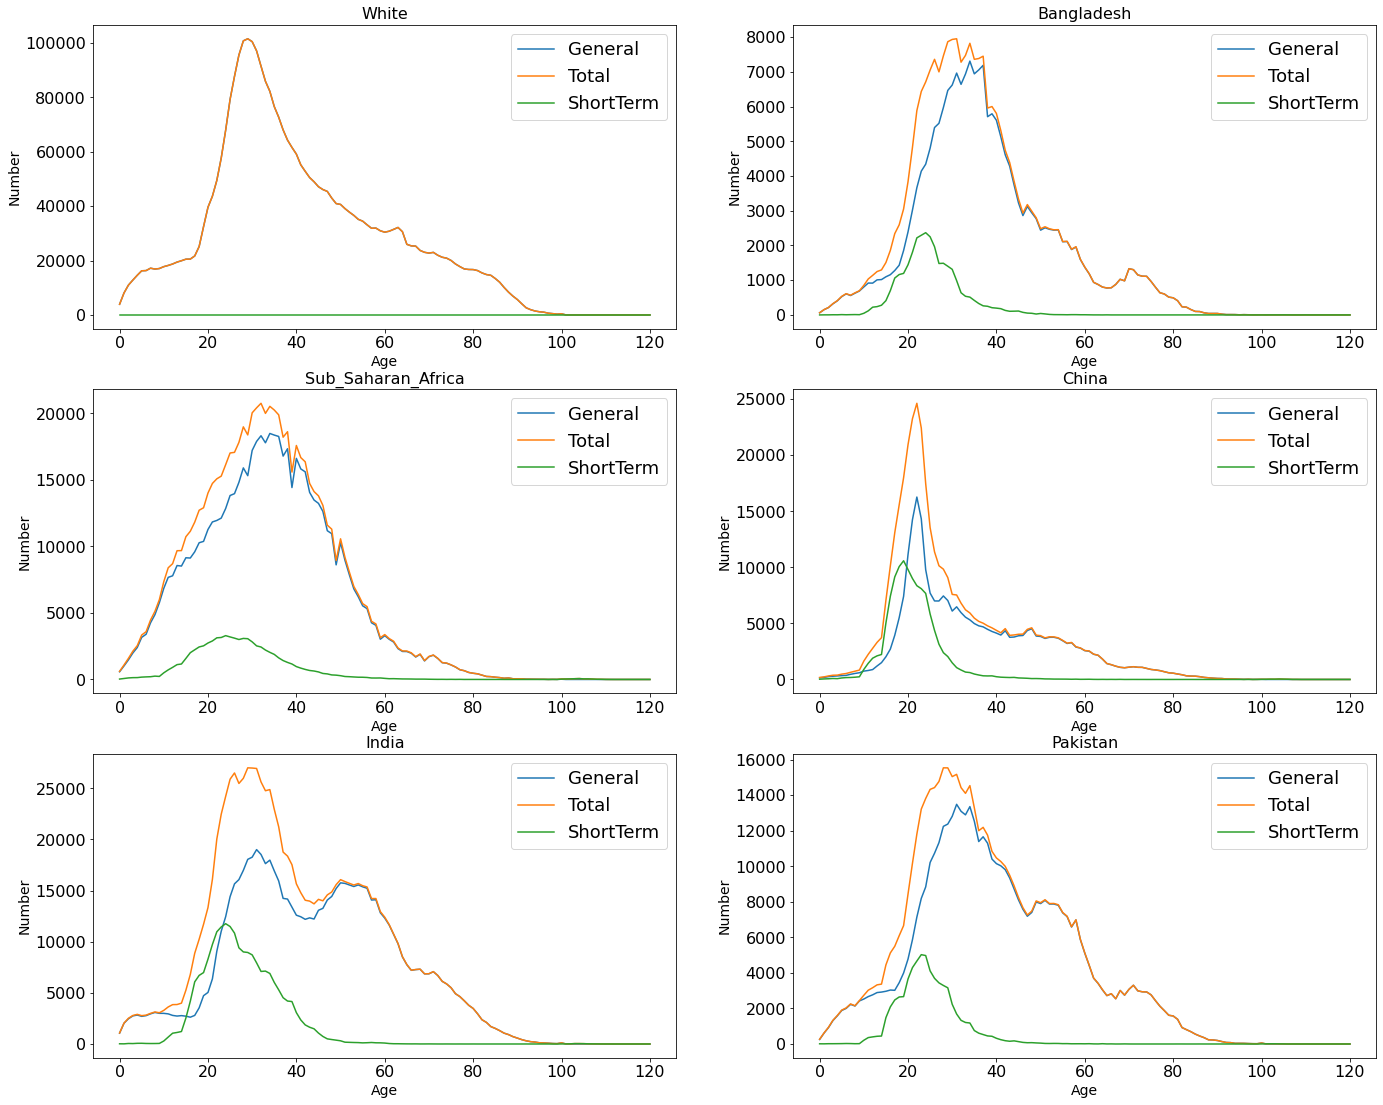

In [19]:
# let's remove the UK-born population and repeat the above.

FB_filter = init_data['ROB'] == 0
init_ROB_data = init_data[FB_filter]

# Get particlar ethnicity...
ageEthGrouped = init_ROB_data.groupby(['Ethnicity', 'Age'])
ageEthSum = ageEthGrouped[['General', 'Total']].aggregate(sum)

fig, ax = plt.subplots(ncols=2, nrows=3)

for i in ethnicities:
    i_row = i // 2
    i_col = i % 2
    currentAx = ax[i_row, i_col]
    ethFilter = ageEthSum.index.get_level_values(0) == i
    plot_df = ageEthSum[ethFilter]
    plot_df = plot_df.assign(ShortTerm=plot_df['Total']-plot_df['General'])
    plot_df = plot_df.assign(Age=plot_df.index.get_level_values(1))
    plot_df.plot.line(x='Age', ax=currentAx)
    currentAx.set_title(index2Country_dict[i], fontsize=16)
    currentAx.set_ylabel('Number', fontsize=14)
    currentAx.set_xlabel(xlabel='Age', fontsize=14)
    currentAx.tick_params(axis='both', which='major', labelsize=16)
    currentAx.legend(fontsize=18)


fig.set_size_inches(figWidth, 19)
# fig.suptitle(f'Country: {index2Country_dict[currentEth]}', fontsize=18)
# fig.tight_layout()
plt.show()

Below is the proposed (and current) solution or 'fix'. For foreign-born individuals, in a given category, the number of short-term immigrants is subtracted from the census population and that number of individuals is put into the general aggregated population. Where there are insufficient individuals in the census, we have **zero** in that category. As a result, in some categories, there is an overall excess in the general + short-term aggregated population when compared to the census population. We're just going to accept that... 

In the panels below, 'Fixed' is the adjusted total aggregated population values and 'Original' is the census. 

In [20]:
# Compare the original output to the 'fixed' output at the census point. 

# Original...
ageEthGrouped = init_data.groupby(['Ethnicity', 'Age'])
ageEthSum = ageEthGrouped['General'].aggregate(sum)    # Just want the general census now.

# New data set...
fileName = 'InitialPopData_Fix1.txt'
init_data_Fix = pd.read_csv(fileName, sep="\t", comment='#')

rename_dict = {'Value': 'General'}
init_data_Fix.rename(columns=rename_dict, inplace=True)
init_data_Fix = init_data_Fix.assign(Total=init_data_Fix['General']+init_data_Fix['ShortTerm'])

ageEthFixGrouped = init_data_Fix.groupby(['Ethnicity', 'Age'])
ageEthFixSum = ageEthFixGrouped['Total'].aggregate(sum)

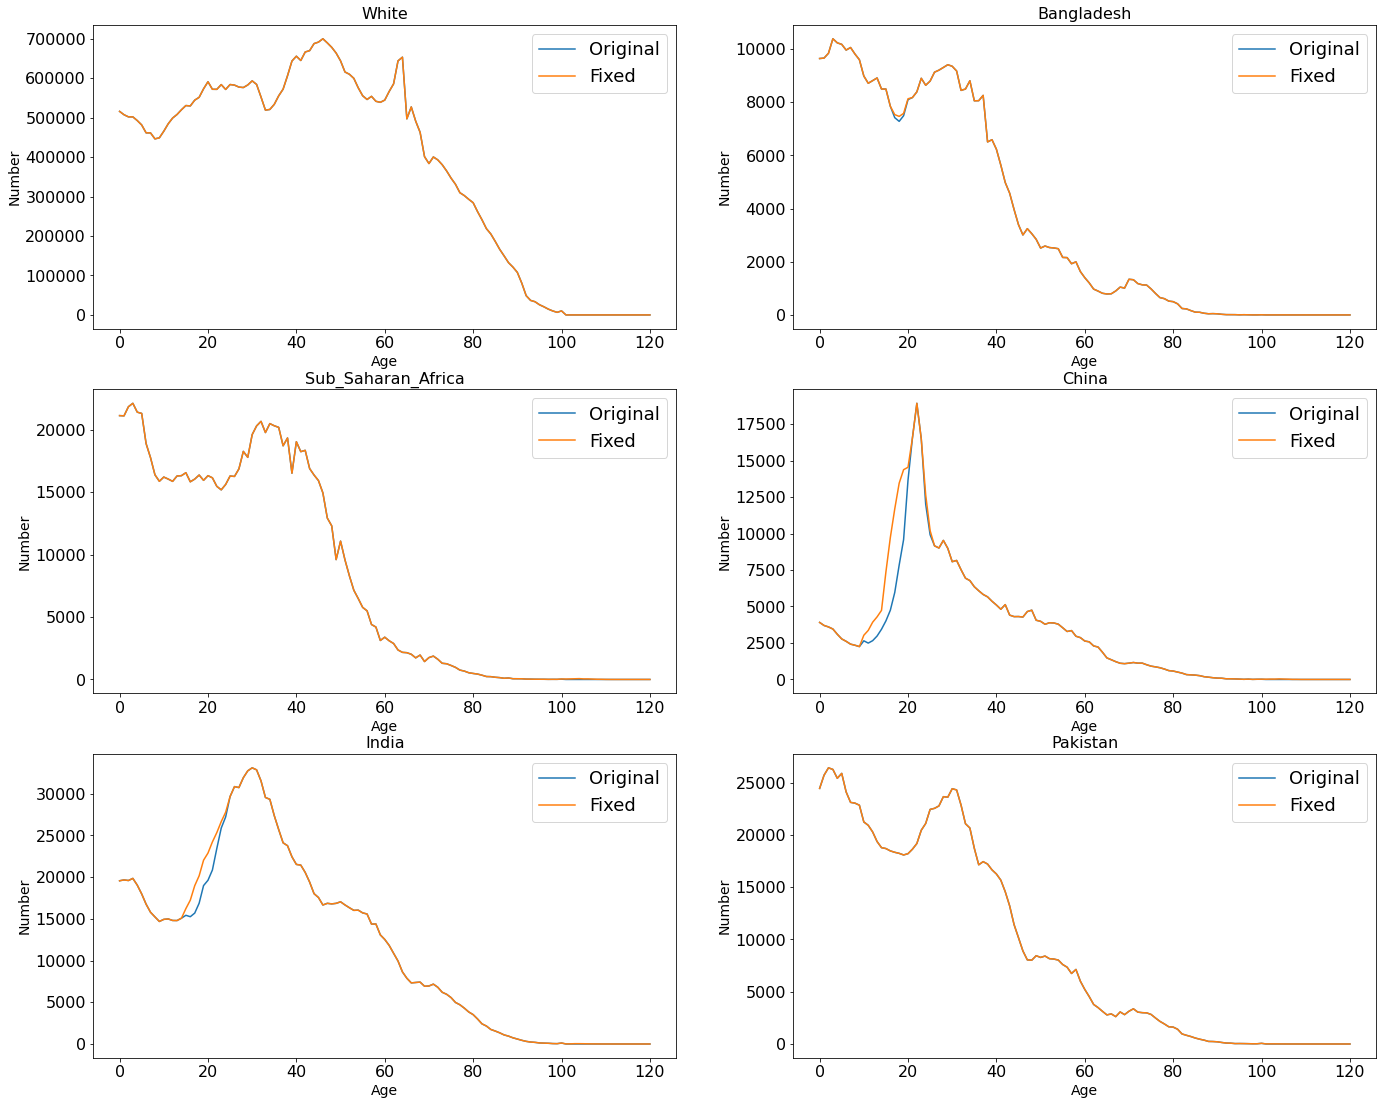

In [21]:
fig, ax = plt.subplots(ncols=2, nrows=3)

for i in ethnicities:
    i_row = i // 2
    i_col = i % 2
    currentAx = ax[i_row, i_col]
    ethFilter = ageEthSum.index.get_level_values(0) == i
    original = ageEthSum[ethFilter]
    fixFilter = ageEthFixSum.index.get_level_values(0) == i
    fixed = ageEthFixSum[fixFilter]
    plot_df = pd.concat([original, fixed], axis=1)
    plot_df = plot_df.assign(Age=plot_df.index.get_level_values(1))
    plot_df.rename(columns={'Total': 'Fixed', 'General': 'Original'}, 
                   inplace=True)
    plot_df.plot.line(x='Age', ax=currentAx)
    currentAx.set_title(index2Country_dict[i], fontsize=16)
    currentAx.set_ylabel('Number', fontsize=14)
    currentAx.set_xlabel(xlabel='Age', fontsize=14)
    currentAx.tick_params(axis='both', which='major', labelsize=16)
    currentAx.legend(fontsize=18)


fig.set_size_inches(figWidth, 19)
# fig.suptitle(f'Country: {index2Country_dict[currentEth]}', fontsize=18)
# fig.tight_layout()
plt.show()

## The 'fix' for the discrepancy in the baseline survey caused by the short-term immigrants
For a given ethnicity, age and sex in the foreign born population, I've removed from the aggregated population the the number of people in the short-term population. This allows the total to match the census, except where there are more individuals in the short-term population than are available in the foreign-born aggregate population. In that case, there's a slight excess in the totals (see China and India).  

In [22]:
# Read in data and convert to wide format.

# X-sectional data at a sequence of times with NO imediate settlement influx. 
fileName = 'DemogXsections_Fix.txt'
rawFixed_data = pd.read_csv(fileName, sep="\t", comment='#')
rawFixed_data['Year'] = rawFixed_data['Time'].astype(int)
rawFixed_data.drop(['Time'], axis=1, inplace=True)

# Changing into wide format. 
# construct an index that pivot can use. 
indexColumns = ['Ethnicity', 'Age']
newIndex = [(x.values[0], x.values[1]) for i, x in rawFixed_data[indexColumns].iterrows()]

rawFixed_data.index = newIndex

# make the data wide in Year. 
wide_df = rawFixed_data.pivot(columns='Year', values='Number')
year_cols = wide_df.columns.values

# get the index data back into a form to add as columns. 
xx = list(wide_df.index.values)
df = pd.DataFrame(xx)
df.columns = indexColumns

# Index mismatch causes nans in the data. Need to drop them. 
wide_df = pd.concat([df.reset_index(drop=True), wide_df.reset_index(drop=True)], axis=1)

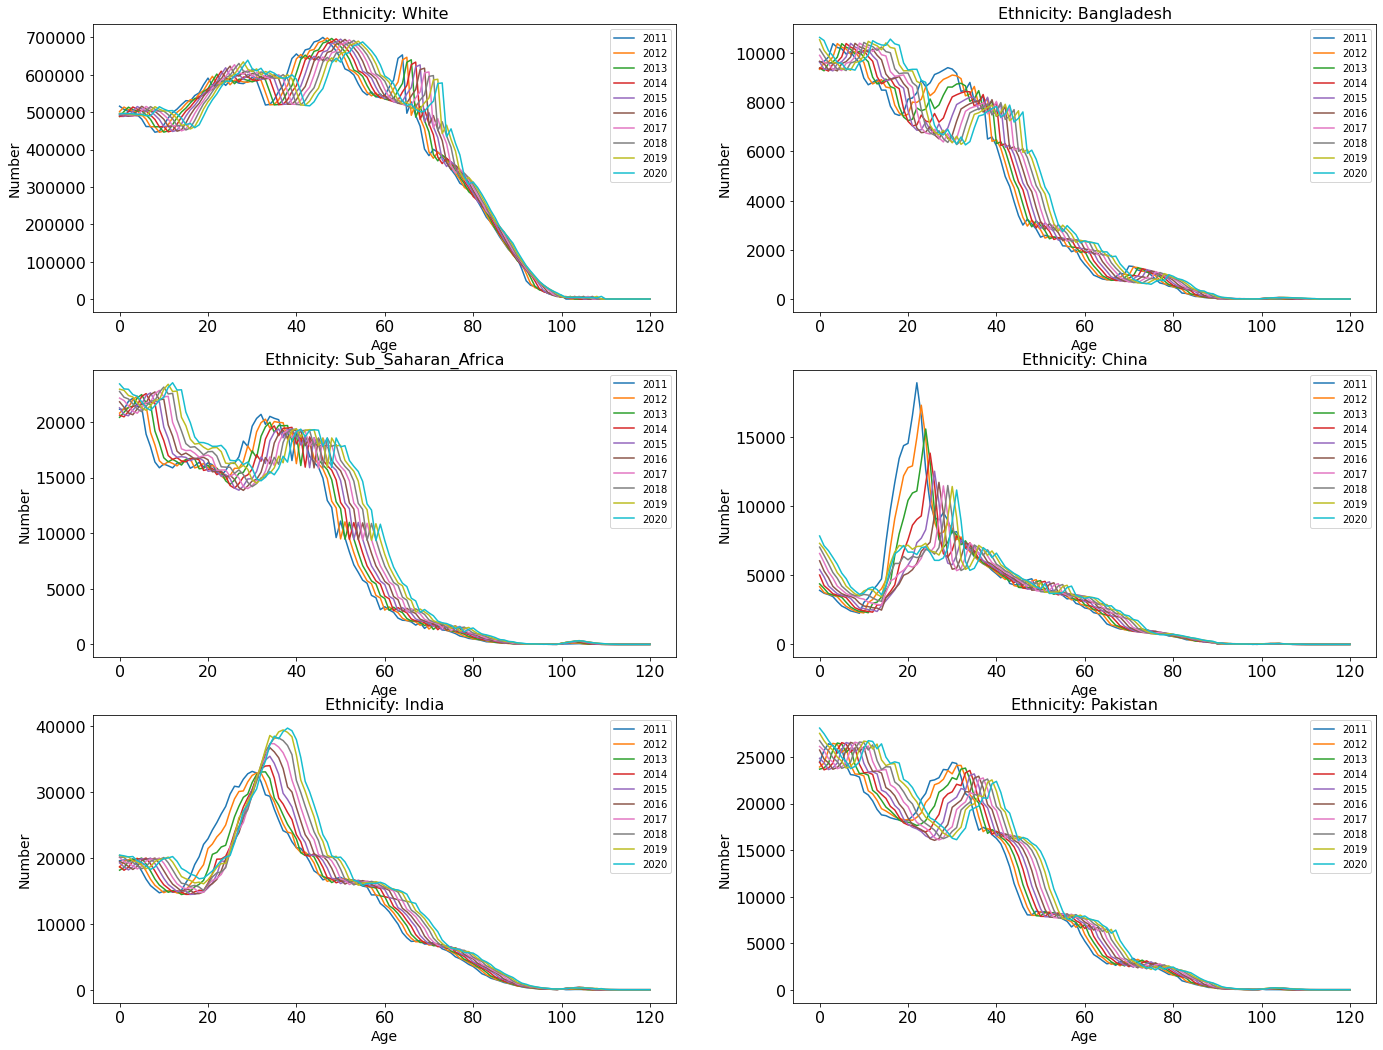

In [23]:
# Group by ethnicity and draw... 

groupedByEth = wide_df.groupby('Ethnicity')

nC = 2
nR = 3
i = 0   # index of the current plot in the loop.
fig, ax = plt.subplots(ncols=nC, nrows=nR)

# loop through the elements of the grouping. 
for eth, plot_df in groupedByEth:
    i_row = i // 2
    i_col = i % 2
    currentAx = ax[i_row, i_col]
    plot_df.plot.line(x='Age', y=year_cols, ax=currentAx)
    plotTitle = f'Ethnicity: {index2Country_dict[eth]}'
    currentAx.set_title(plotTitle, fontsize=16)
    currentAx.set_ylabel('Number', fontsize=14)
    currentAx.set_xlabel(xlabel='Age', fontsize=14)
    currentAx.tick_params(axis='both', which='major', labelsize=16)
    i = i+1

fig.set_size_inches(figWidth, 18)
plt.show()

# TB cases at baseline <a id='TBCasesBaseline'></a>

What does the distribution of TB cases in 2011 look like? The source of is **ETS_TB_cases_2011** from Laura. This is converted to the 6-country configuration by removing Black Caribbean, Black Other and Mixed Other, and renaming Black African to Sub-Saharan Africa. NAs are removed and the age groupings are introduced. Results below are by age group and country for both UK-born and non-UK born cases. 

First, the UK-born cases:

In [24]:
# Read in and clean the data. Group it by ethnicity and age group.
fileName = 'ETS_TB_cases_2011.csv'
case_data = pd.read_csv(fileName)

# Filter the nan's.
case_data.dropna(inplace=True)

# Reassign to standard ethnic labels.
oldEthValues = np.unique(case_data['ethgrp'])
newEthValues = ['Bangladesh', 'Sub_Saharan_Africa', 'Remove', 'Remove', 'China',
                'India', 'Remove', 'Pakistan', 'White']

# Dictionary to swap names over.
eth_dict = {v: newEthValues[i] for i, v in enumerate(oldEthValues)}

case_data2 = case_data.replace(eth_dict)

# Remove ethnicities that are now 'Remove'.
case_data2 = case_data2[case_data2.ethgrp != 'Remove']

ethnicities = np.unique(case_data2['ethgrp'])
print('Fields in dataset:')
print(case_data2.columns.values)

# Create some agebins.
ageBinWidth = 10
rangeValue = (100//ageBinWidth) + 1
ageBins = [i*ageBinWidth for i in range(rangeValue)]
ageLabels = [str(i*ageBinWidth)+'-'+str((i+1)*ageBinWidth) for i in range(10)]
case_data2 = case_data2.assign(ageGrp=pd.cut(case_data2['age'], bins=ageBins,
                                             right=False, labels=ageLabels))

Fields in dataset:
['age' 'sex' 'ethgrp' 'cob' 'n']


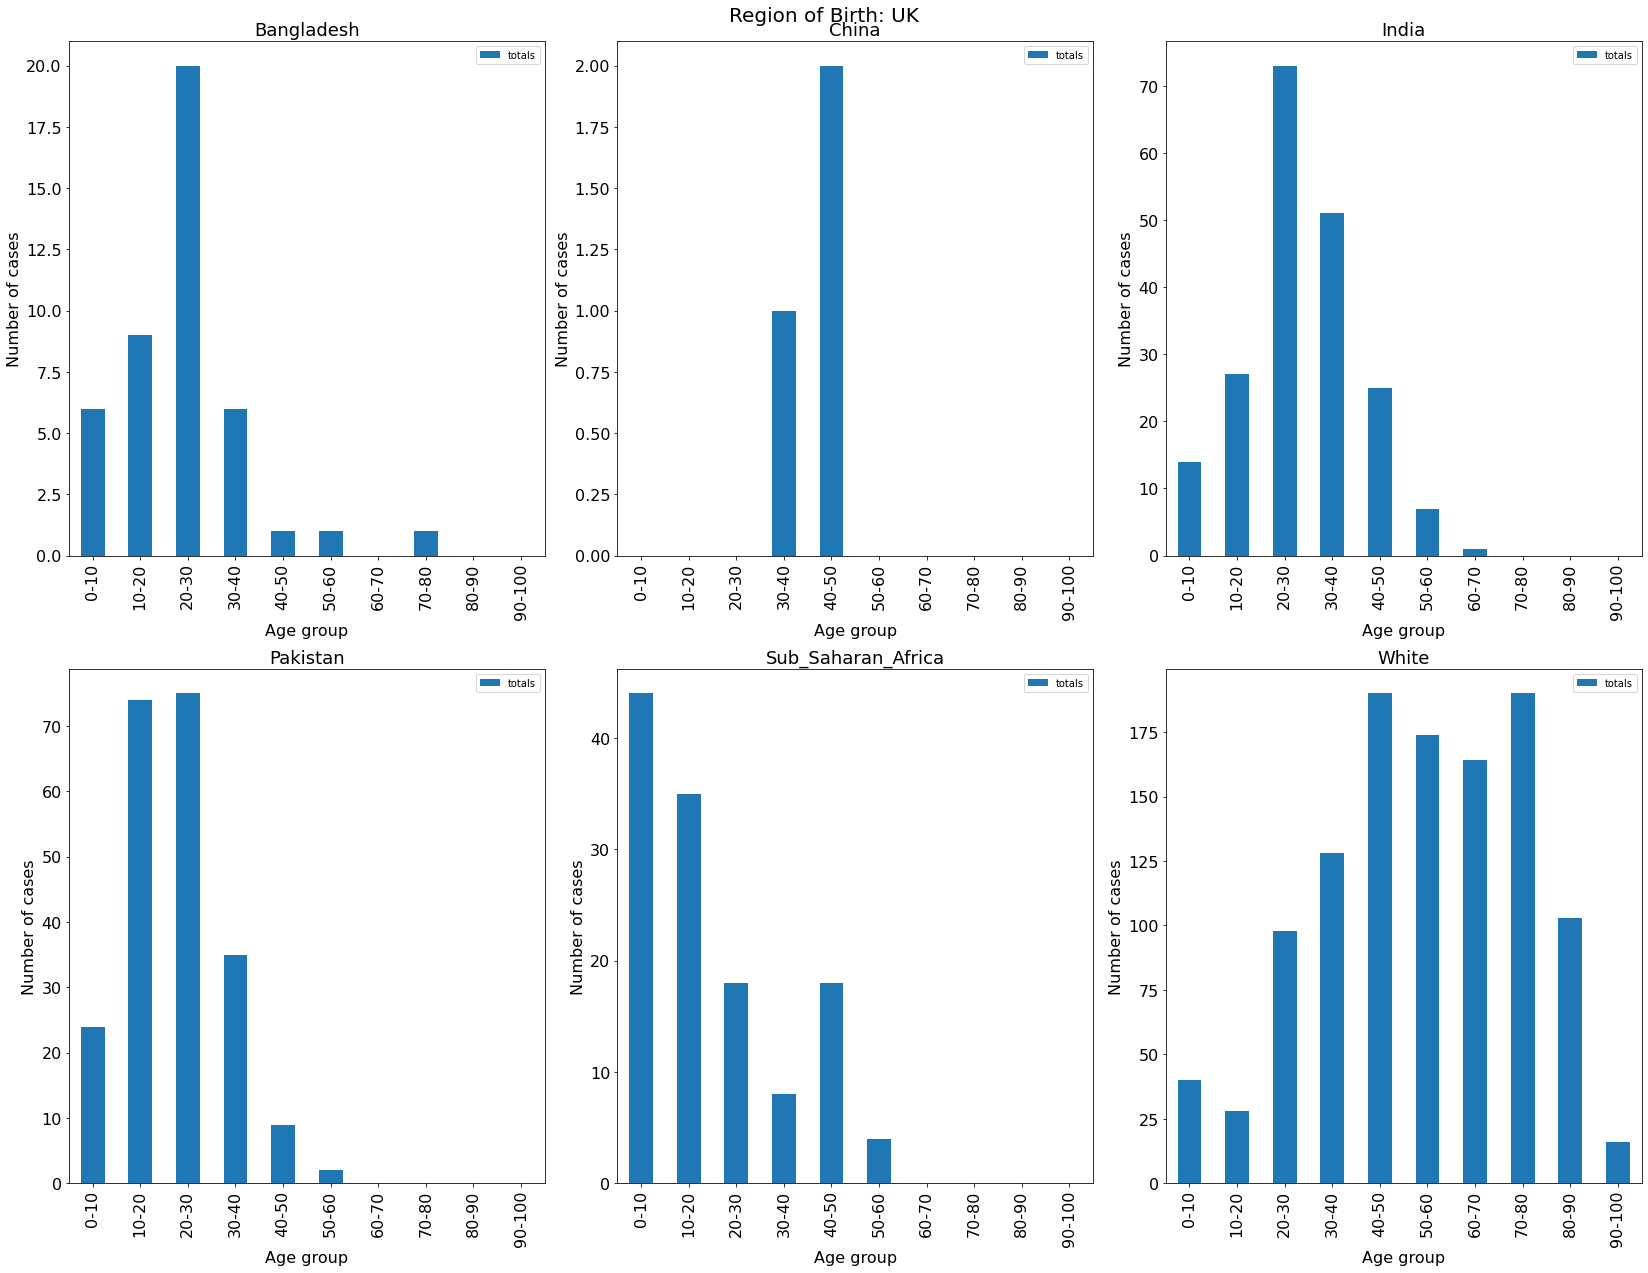

In [25]:
# plot bar graphs...

rob = 'UK'

# filter for rob and group. 
groupedData = case_data2[case_data2['cob'] == rob].groupby(['ethgrp', 'ageGrp'])
groupTotals = groupedData['n'].agg(np.sum)

totalByAgeGrpEthGrp = groupTotals.index.to_frame()
totalByAgeGrpEthGrp = totalByAgeGrpEthGrp.assign(totals=groupTotals.values)

nC = 3
nR = 2
fig, ax = plt.subplots(ncols=nC, nrows=nR)

for i, eth in enumerate(ethnicities):
    i_row = i // nC
    i_col = i % nC
    currentAx = ax[i_row, i_col]
    plot_df = totalByAgeGrpEthGrp[totalByAgeGrpEthGrp['ethgrp'] == eth]
    plot_df.plot.bar(x='ageGrp', y='totals', ax=currentAx)
    plotTitle = eth
    currentAx.set_title(plotTitle, fontsize=18)
    currentAx.set_ylabel('Number of cases', fontsize=16)
    currentAx.set_xlabel(xlabel='Age group', fontsize=16)
    currentAx.tick_params(axis='both', which='major', labelsize=16)


fig.set_size_inches(figWidth, 18)
fig.suptitle(f'Region of Birth: {rob}', fontsize=20)
fig.tight_layout()
plt.show()

Now the non UK-born cases:

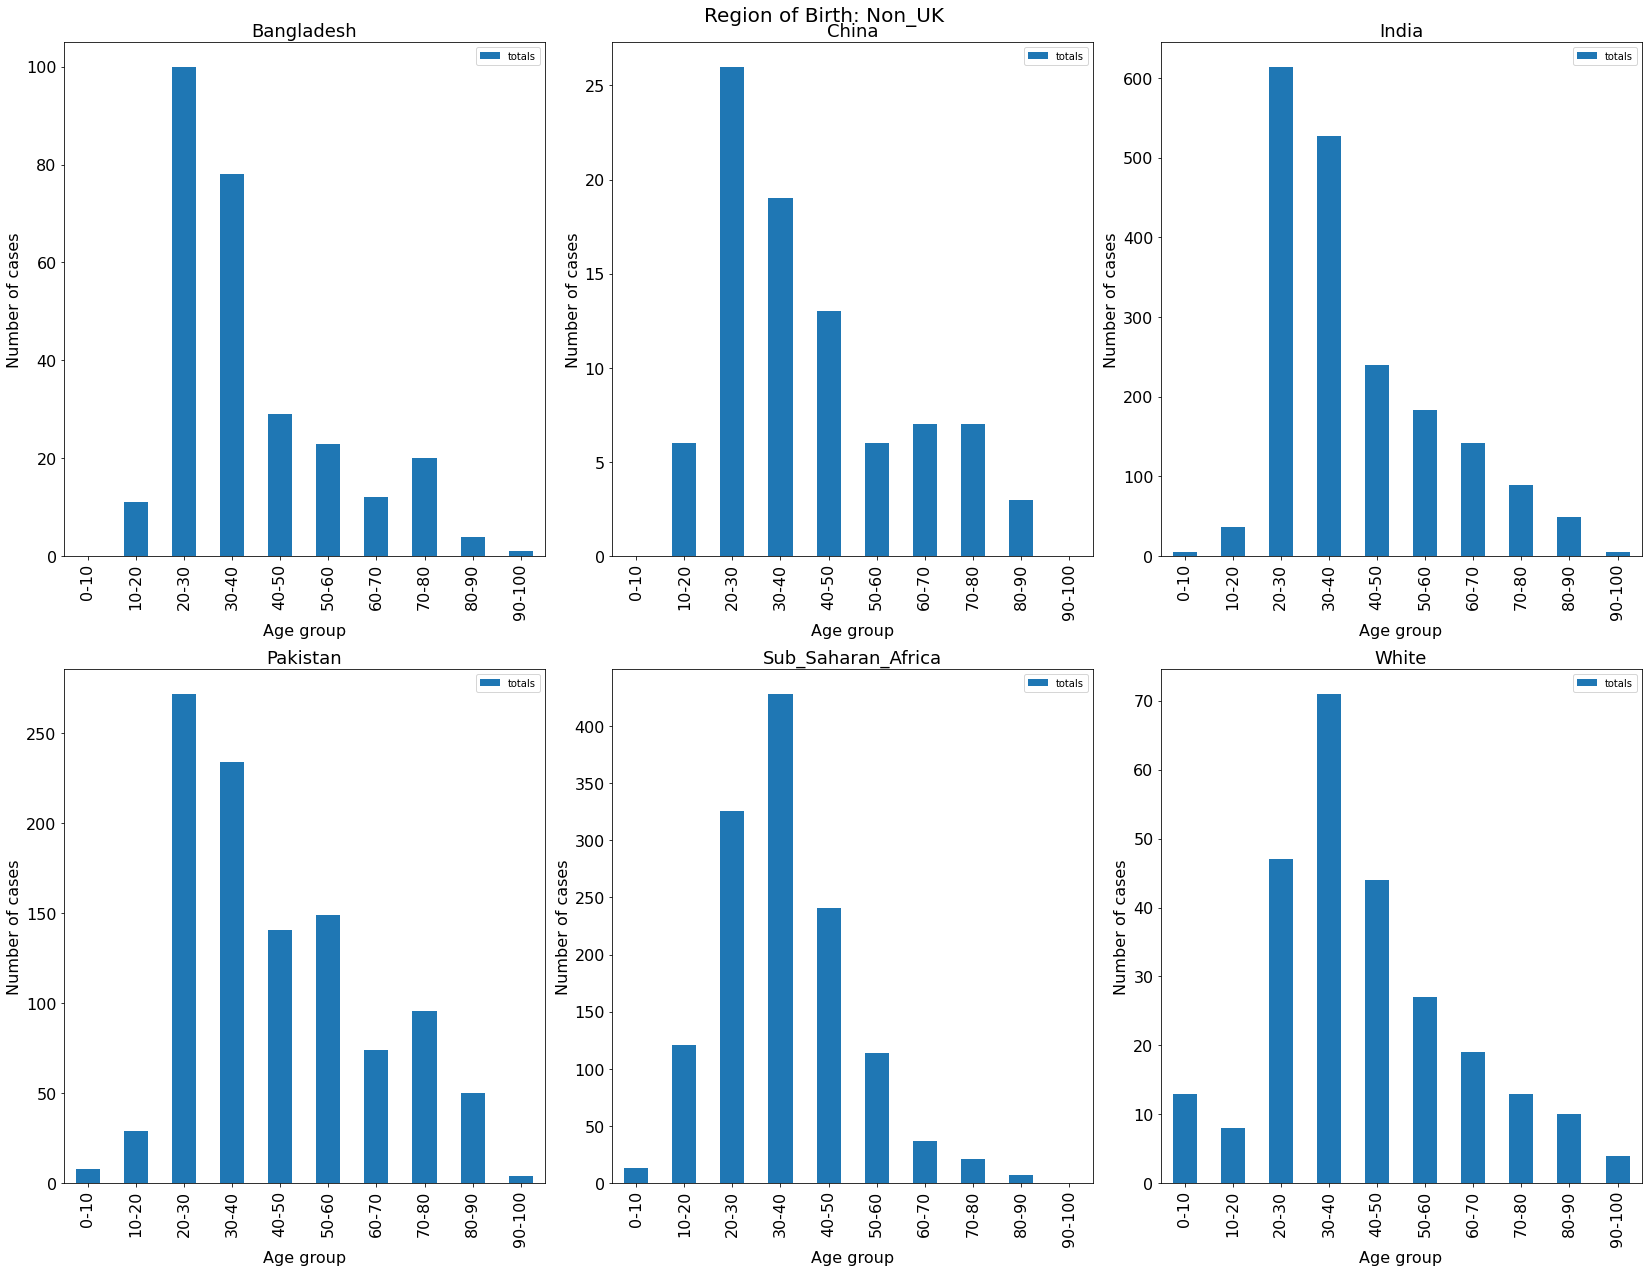

In [26]:
# plot bar graphs...

rob = 'Non_UK'

# filter for rob and group. 
groupedData = case_data2[case_data2['cob'] == rob].groupby(['ethgrp', 'ageGrp'])
groupTotals = groupedData['n'].agg(np.sum)

totalByAgeGrpEthGrp = groupTotals.index.to_frame()
totalByAgeGrpEthGrp = totalByAgeGrpEthGrp.assign(totals=groupTotals.values)

nC = 3
nR = 2
fig, ax = plt.subplots(ncols=nC, nrows=nR)

for i, eth in enumerate(ethnicities):
    i_row = i // nC
    i_col = i % nC
    currentAx = ax[i_row, i_col]
    plot_df = totalByAgeGrpEthGrp[totalByAgeGrpEthGrp['ethgrp'] == eth]
    plot_df.plot.bar(x='ageGrp', y='totals', ax=currentAx)
    plotTitle = eth
    currentAx.set_title(plotTitle, fontsize=18)
    currentAx.set_ylabel('Number of cases', fontsize=16)
    currentAx.set_xlabel(xlabel='Age group', fontsize=16)
    currentAx.tick_params(axis='both', which='major', labelsize=16)


fig.set_size_inches(figWidth, 18)
fig.suptitle(f'Region of Birth: {rob}', fontsize=20)
fig.tight_layout()
plt.show()

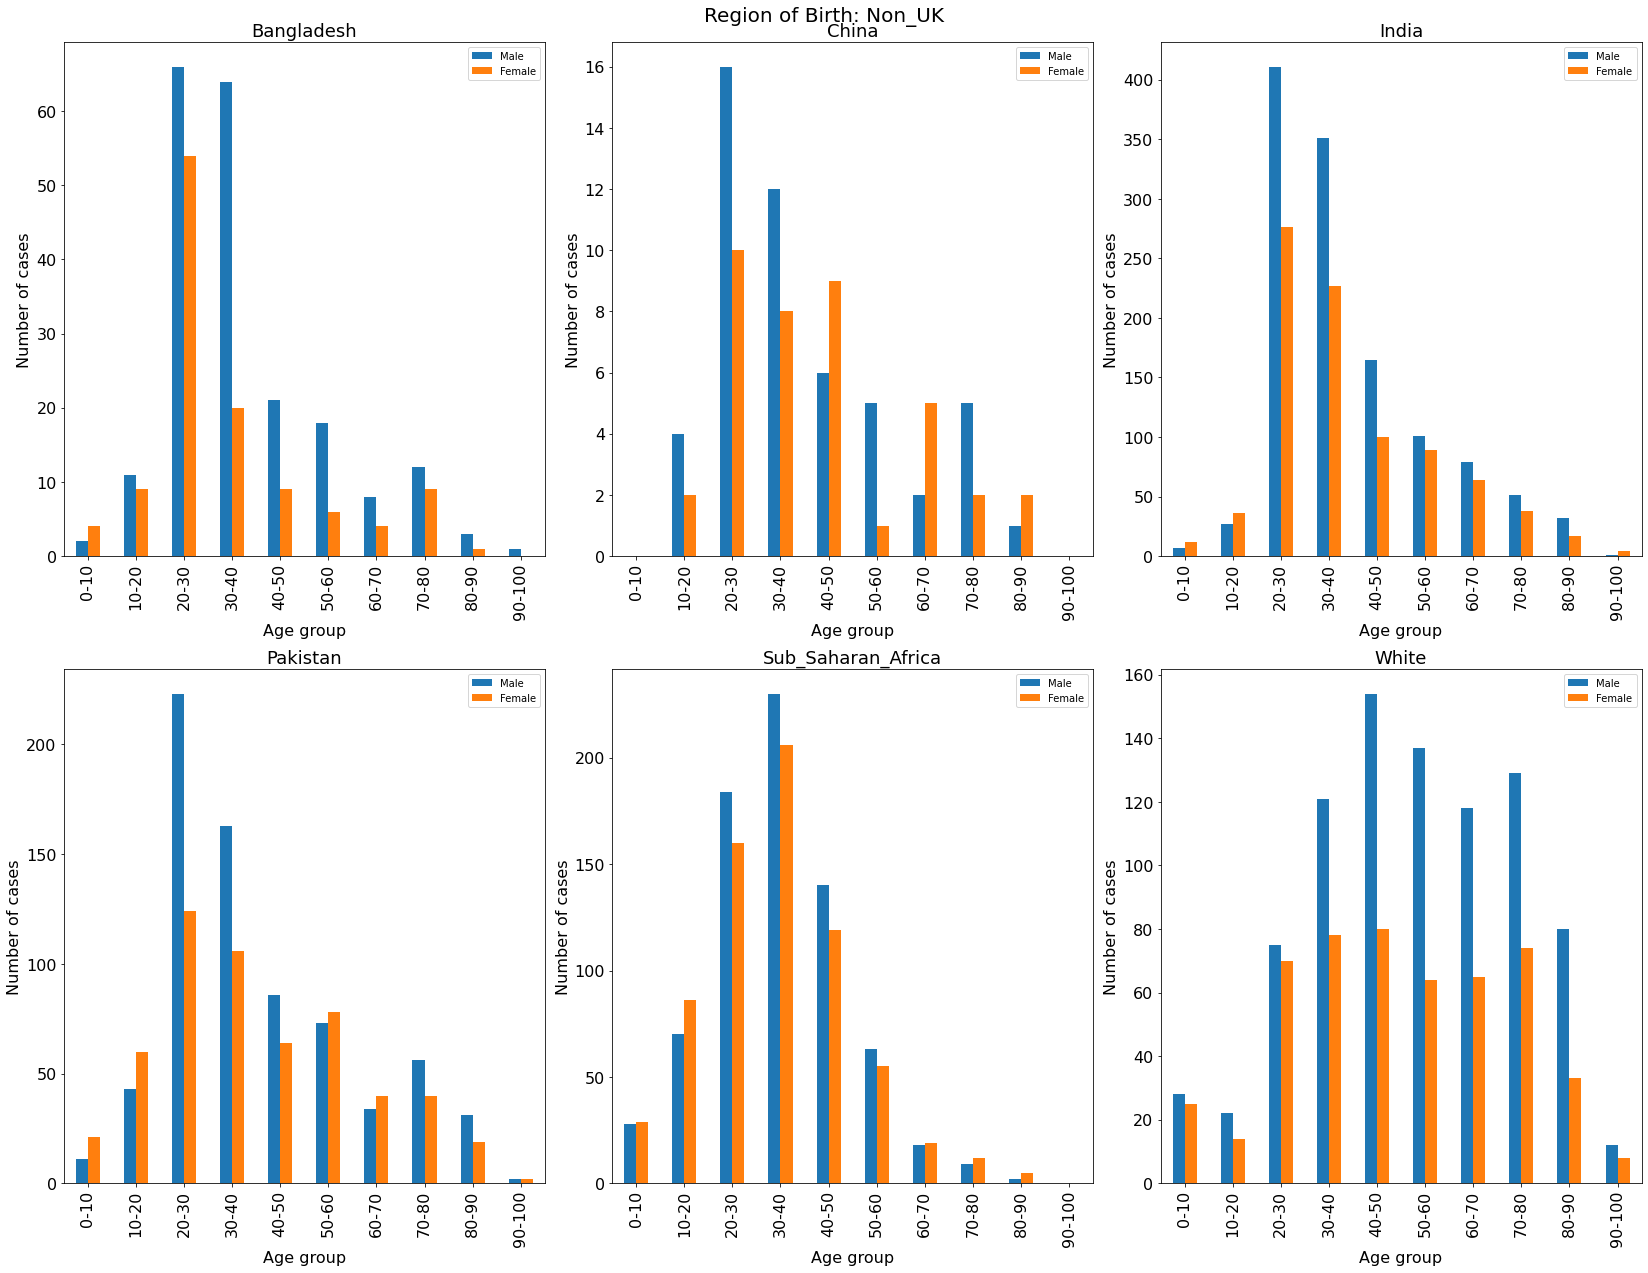

In [27]:
# plot bar graphs showing the male/female aspect. 

groupedData_M = case_data2[case_data2['sex'] == 'M'].groupby(['ethgrp', 'ageGrp'])
groupTotals_M = groupedData_M['n'].agg(np.sum)
groupedData_F = case_data2[case_data2['sex'] == 'F'].groupby(['ethgrp', 'ageGrp'])
groupTotals_F = groupedData_F['n'].agg(np.sum)

total_df = groupTotals_M.index.to_frame()
total_df = total_df.assign(Male=groupTotals_M, Female=groupTotals_F)


nC = 3
nR = 2
fig, ax = plt.subplots(ncols=nC, nrows=nR)

for i, eth in enumerate(ethnicities):
    i_row = i // nC
    i_col = i % nC
    currentAx = ax[i_row, i_col]
    plot_df = total_df[total_df['ethgrp'] == eth]
    plot_df.plot.bar(x='ageGrp', y=['Male', 'Female'], ax=currentAx)
    plotTitle = eth
    currentAx.set_title(plotTitle, fontsize=18)
    currentAx.set_ylabel('Number of cases', fontsize=16)
    currentAx.set_xlabel(xlabel='Age group', fontsize=16)
    currentAx.tick_params(axis='both', which='major', labelsize=16)


fig.set_size_inches(figWidth, 18)
fig.suptitle(f'Region of Birth: {rob}', fontsize=20)
fig.tight_layout()
plt.show()

# Comments on the distribution of cases
 * In general for non-white categories, there are 5-10 times more cases among non-UK born individuals as among UK born individuals. 
 * For whites, this is reversed with UK born cases being about twice the number of non-UK born ones. 
 * Generally, for a given country, non-K cases are skewed older than UK ones and generally have a wider distribution. 
 * Again, for whites, this pattern is reversed. 
 * There are generally more male than female cases. This might arise from sex differences in the number of immigrants, but fitting will clarify this issue. 

In [28]:
# Reconstructing the equilibrium population for the different ethnicities and ROB values. 
# Read in the data and clean it. 

dataFolder = 'BaselineFitDemog\\'

fileName = 'ImmigBaseline.txt' 
immig_data = pd.read_csv(dataFolder + fileName, sep='\t', comment='#')
fileName = 'MortalityBaseline.txt' 
mortality_data = pd.read_csv(dataFolder + fileName, sep='\t', comment='#')
fileName = 'EmigBaseline.txt' 
emig_data = pd.read_csv(dataFolder + fileName, sep='\t', comment='#')
fileName = 'BirthRateBaseline.txt' 
birth_data = pd.read_csv(dataFolder + fileName, sep='\t', comment='#')

ethnicity_values = np.unique(birth_data['EthnicityIndex'])
ROB_values = np.unique(emig_data['ROB'])
year_values = np.unique(emig_data['Age'])

# aggregate the male and female values. 
grouped_data = immig_data.groupby(['EthnicityIndex', 'ROB', 'Age'])
grouped_MFTot = grouped_data['Value'].agg(np.sum)
immigMF_data = grouped_MFTot.index.to_frame(index=False)
immigMF_data = immigMF_data.assign(Total=grouped_MFTot.values)
# group by EthnicityIndex and ROB for later...
immigByEthROB = immigMF_data.groupby(['EthnicityIndex', 'ROB'])

grouped_data = mortality_data.groupby(['EthnicityIndex', 'Age'])
grouped_MFTot = grouped_data['Value'].agg(np.sum)
mortMF_data = grouped_MFTot.index.to_frame(index=False)
mortMF_data = mortMF_data.assign(Total=grouped_MFTot.values)
mortByEth = mortMF_data.groupby('EthnicityIndex')

grouped_data = emig_data.groupby(['EthnicityIndex', 'ROB', 'Age'])
grouped_MFTot = grouped_data['Value'].agg(np.sum)
emigMF_data = grouped_MFTot.index.to_frame(index=False)
emigMF_data = emigMF_data.assign(Total=grouped_MFTot.values)
emigByEthROB = emigMF_data.groupby(['EthnicityIndex', 'ROB'])

grouped_data = birth_data.groupby('EthnicityIndex')
grouped_MFTot = grouped_data['Value'].agg(np.sum)
birthMF_data = grouped_MFTot.index.to_frame()
birthMF_data = birthMF_data.assign(Total=grouped_MFTot.values)

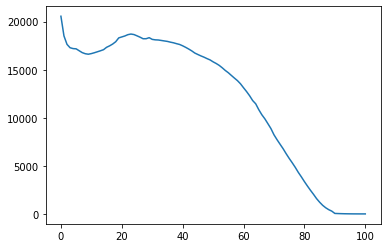

In [29]:
# Construct the equilibrium populations. 

'''
Takes: a tuple (eth, ROB)
Returns: an array of populations by age. 
Uses: birthMF_data, imm_values, emm_values, mort_values. 
'''
def getEquPop(currentIndex):
    currentBirth = birthMF_data['Total'][currentIndex[0]]

    dt = 1.0
    imm_values = immigByEthROB.get_group(currentIndex)['Total'].values
    emm_values = emigByEthROB.get_group(currentIndex)['Total'].values
    mort_values = mortByEth.get_group(currentIndex[0])['Total'].values
    N = np.zeros_like(mort_values)

    l_values = (emm_values+mort_values)

    N[0] = currentBirth
    for i in range(0,len(mort_values)-1):
        q = 1.0
        if(l_values[i]>0.0001):
            q = (1 - np.exp(-l_values[i]*dt))/l_values[i]
        
        N[i+1] = N[i]*np.exp(-l_values[i]*dt) + imm_values[i]*q

    return N

testIndex = (2, 0) # That's ethnicity, ROB. 

outValues = getEquPop(testIndex)
plt.plot(outValues)

# get a list of keys from the groups. 
all_keys = list(immigByEthROB.groups.keys())

all_equPops = [getEquPop(i) for i in all_keys]

